<a href="https://colab.research.google.com/github/AbdulSafiCS/Customer-Satisfaction-Predictor/blob/master/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1
## Project members: Jesus Casas, Victoria Miteva, Luis Olmos, Abdul Hasib Safi, Luis Cedeno

# Problem Description:

Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship.

In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.

# Evaluation

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

# Submission File

For each ID in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```
ID,TARGET
2,0
5,0
6,0
etc.
```
Your submission should be a CSV file with 75818 rows and a header.

The grade for this Project will be the following:

a) 20% - submission before the due date (May 5th).

b) 75% - correctness and completeness of the report and code. Your report should describe the problem in your own words, describe the methods you used for analysis with justification and the results (graphs, plots, tables, whatever you think is necessary), including your ranking on Kaggle. The report should be at most 5 pages.

c) 5% - will be based on the score you get from your prediction submission:

5% if score >= 0.825

4% if score >= 0.824

3% if score >= 0.821

2% if score >= 0.813

1% score < 0.813

# Step 1: Load in required packages

In [ ]:
# Importing all required assets
# List of required packages
packages <- c("googledrive", "factoextra", "gtools", "patchwork", "rlang", "ggplot2",
              "cluster", "readr", "dplyr", "class", "gridExtra", "randomForest",
              "pROC", "caret", "rpart", "rpart.plot", "xgboost")

# Install missing packages
installed <- rownames(installed.packages())
to_install <- setdiff(packages, installed)
if (length(to_install)) install.packages(to_install)

# Load Library(package) to all packages
invisible(lapply(packages, library, character.only = TRUE))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘reformulas’, ‘lava’, ‘pbkrtest’, ‘lme4’, ‘prodlim’, ‘car’, ‘DT’, ‘rstatix’, ‘ipred’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘recipes’


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘rlang’


The following object is masked from ‘package:gtools’:

    chr



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘pack

In [ ]:
drive_auth(use_oob = TRUE)  # Always require credentials, Downloading assets
drive_download(as_id("1nKevgzbbKmBH-u-zdoExcoY2QWLgFvCR"), path = "sample_submission.csv", overwrite = TRUE)
drive_download(as_id("15l1jKk2zSKPD59b0nPNyOMYkgdxMpOw0"), path = "test.csv", overwrite = TRUE)
drive_download(as_id("18i4oR_tnnohPpdxQjdN9xDM01ZDCIXvY"), path = "train.csv", overwrite = TRUE)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=e9093469bb5ecc2af2c6089f3672a879&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWJfNXFsbTRaZjdDQ09UREpZSzZfUmZLZzVKdzljN2dfT2VXeWlmNVMwLVBtYUlKZGYzQjZEVkJqZkVVQ3d2MkFDRk1kUSIsInN0YXRlIjoiZTkwOTM0NjliYjVlY2MyYWYyYzYwODlmMzY3MmE4NzkifQ==


File downloaded:

• sample_submission.csv <id: 1nKevgzbbKmBH-u-zdoExcoY2QWLgFvCR>

Saved locally as:

• sample_submission.csv

File downloaded:

• test.csv <id: 15l1jKk2zSKPD59b0nPNyOMYkgdxMpOw0>

Saved locally as:

• test.csv

File downloaded:

• train.csv <id: 18i4oR_tnnohPpdxQjdN9xDM01ZDCIXvY>

Saved locally as:

• train.csv



# Step 2: Load All Project Files

In [ ]:
### Loading in SAMPLE SUBMISSION file ####
df_sample_submission <- read.csv("sample_submission.csv", header = TRUE)
head(df_sample_submission)

,ID,TARGET
,<int>,<int>
1,2,0
2,5,0
3,6,0
4,7,0
5,9,0
6,11,0


In [ ]:
### Loading in TRAIN file ####
df_train <- read.csv("train.csv", header = TRUE)
head(df_train)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,⋯,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,2,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,39205.17,0
2,3,2,34,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,49278.03,0
3,4,2,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,67333.77,0
4,8,2,37,0,195,195,0,0,0,0,⋯,0,0,0,0,0,0,0,0,64007.97,0
5,10,2,39,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,117310.98,0
6,13,2,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,87975.75,0


In [ ]:
### Loading in TEST file ####
df_test <- read.csv("test.csv", header = TRUE)
head(df_test)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,⋯,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,2,32,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,40532.10
2,5,2,35,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,45486.72
3,6,2,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,46993.95
4,7,2,24,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,187898.61
5,9,2,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,73649.73
6,11,2,43,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,53250.87


# Step 3: Data Exploration

Our steps included . . .

###Basic Data Structure

In [ ]:
# Look at the structure of the training data
str(df_train)
dim(df_train)  # Number of rows and columns

'data.frame':	76020 obs. of  371 variables:
 $ ID                           : int  1 3 4 8 10 13 14 18 20 23 ...
 $ var3                         : int  2 2 2 2 2 2 2 2 2 2 ...
 $ var15                        : int  23 34 23 37 39 23 27 26 45 25 ...
 $ imp_ent_var16_ult1           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ imp_op_var39_comer_ult1      : num  0 0 0 195 0 0 0 0 0 0 ...
 $ imp_op_var39_comer_ult3      : num  0 0 0 195 0 0 0 0 0 0 ...
 $ imp_op_var40_comer_ult1      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ imp_op_var40_comer_ult3      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ imp_op_var40_efect_ult1      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ imp_op_var40_efect_ult3      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ imp_op_var40_ult1            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ imp_op_var41_comer_ult1      : num  0 0 0 195 0 0 0 0 0 0 ...
 $ imp_op_var41_comer_ult3      : num  0 0 0 195 0 0 0 0 0 0 ...
 $ imp_op_var41_efect_ult1      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ imp_op_var41_efect_ult3      : num  0 0 0 0 0 0

[1] 76020   371

In [ ]:
#training data summary
summary(df_train)

       ID              var3             var15        imp_ent_var16_ult1 
 Min.   :     1   Min.   :-999999   Min.   :  5.00   Min.   :     0.00  
 1st Qu.: 38105   1st Qu.:      2   1st Qu.: 23.00   1st Qu.:     0.00  
 Median : 76043   Median :      2   Median : 28.00   Median :     0.00  
 Mean   : 75964   Mean   :  -1523   Mean   : 33.21   Mean   :    86.21  
 3rd Qu.:113749   3rd Qu.:      2   3rd Qu.: 40.00   3rd Qu.:     0.00  
 Max.   :151838   Max.   :    238   Max.   :105.00   Max.   :210000.00  
 imp_op_var39_comer_ult1 imp_op_var39_comer_ult3 imp_op_var40_comer_ult1
 Min.   :    0.00        Min.   :    0.0         Min.   :   0.000       
 1st Qu.:    0.00        1st Qu.:    0.0         1st Qu.:   0.000       
 Median :    0.00        Median :    0.0         Median :   0.000       
 Mean   :   72.36        Mean   :  119.5         Mean   :   3.559       
 3rd Qu.:    0.00        3rd Qu.:    0.0         3rd Qu.:   0.000       
 Max.   :12888.03        Max.   :21024.8         Ma

In [ ]:
# Create a data frame of column names and types for train
df_train_types <- data.frame(
  Column = names(df_train),
  Data_Type = sapply(df_train, class)
)

# Print it
print(df_train_types)

                                                     Column Data_Type
ID                                                       ID   integer
var3                                                   var3   integer
var15                                                 var15   integer
imp_ent_var16_ult1                       imp_ent_var16_ult1   numeric
imp_op_var39_comer_ult1             imp_op_var39_comer_ult1   numeric
imp_op_var39_comer_ult3             imp_op_var39_comer_ult3   numeric
imp_op_var40_comer_ult1             imp_op_var40_comer_ult1   numeric
imp_op_var40_comer_ult3             imp_op_var40_comer_ult3   numeric
imp_op_var40_efect_ult1             imp_op_var40_efect_ult1   numeric
imp_op_var40_efect_ult3             imp_op_var40_efect_ult3   numeric
imp_op_var40_ult1                         imp_op_var40_ult1   numeric
imp_op_var41_comer_ult1             imp_op_var41_comer_ult1   numeric
imp_op_var41_comer_ult3             imp_op_var41_comer_ult3   numeric
imp_op_var41_efect_u

In [ ]:
# For train set
num_missing_cols_train <- sum(colSums(is.na(df_train)) > 0)

cat("Number columns with missing values:", num_missing_cols_train, "\n")

Number columns with missing values: 0 


In [ ]:
# Compare column names between train and test and show missing column
setdiff(names(df_train), names(df_test))
setdiff(names(df_test), names(df_train))

# Compare number of columns
ncol(df_train)
ncol(df_test)


[1] "TARGET"

character(0)

[1] 371

[1] 370

Plots

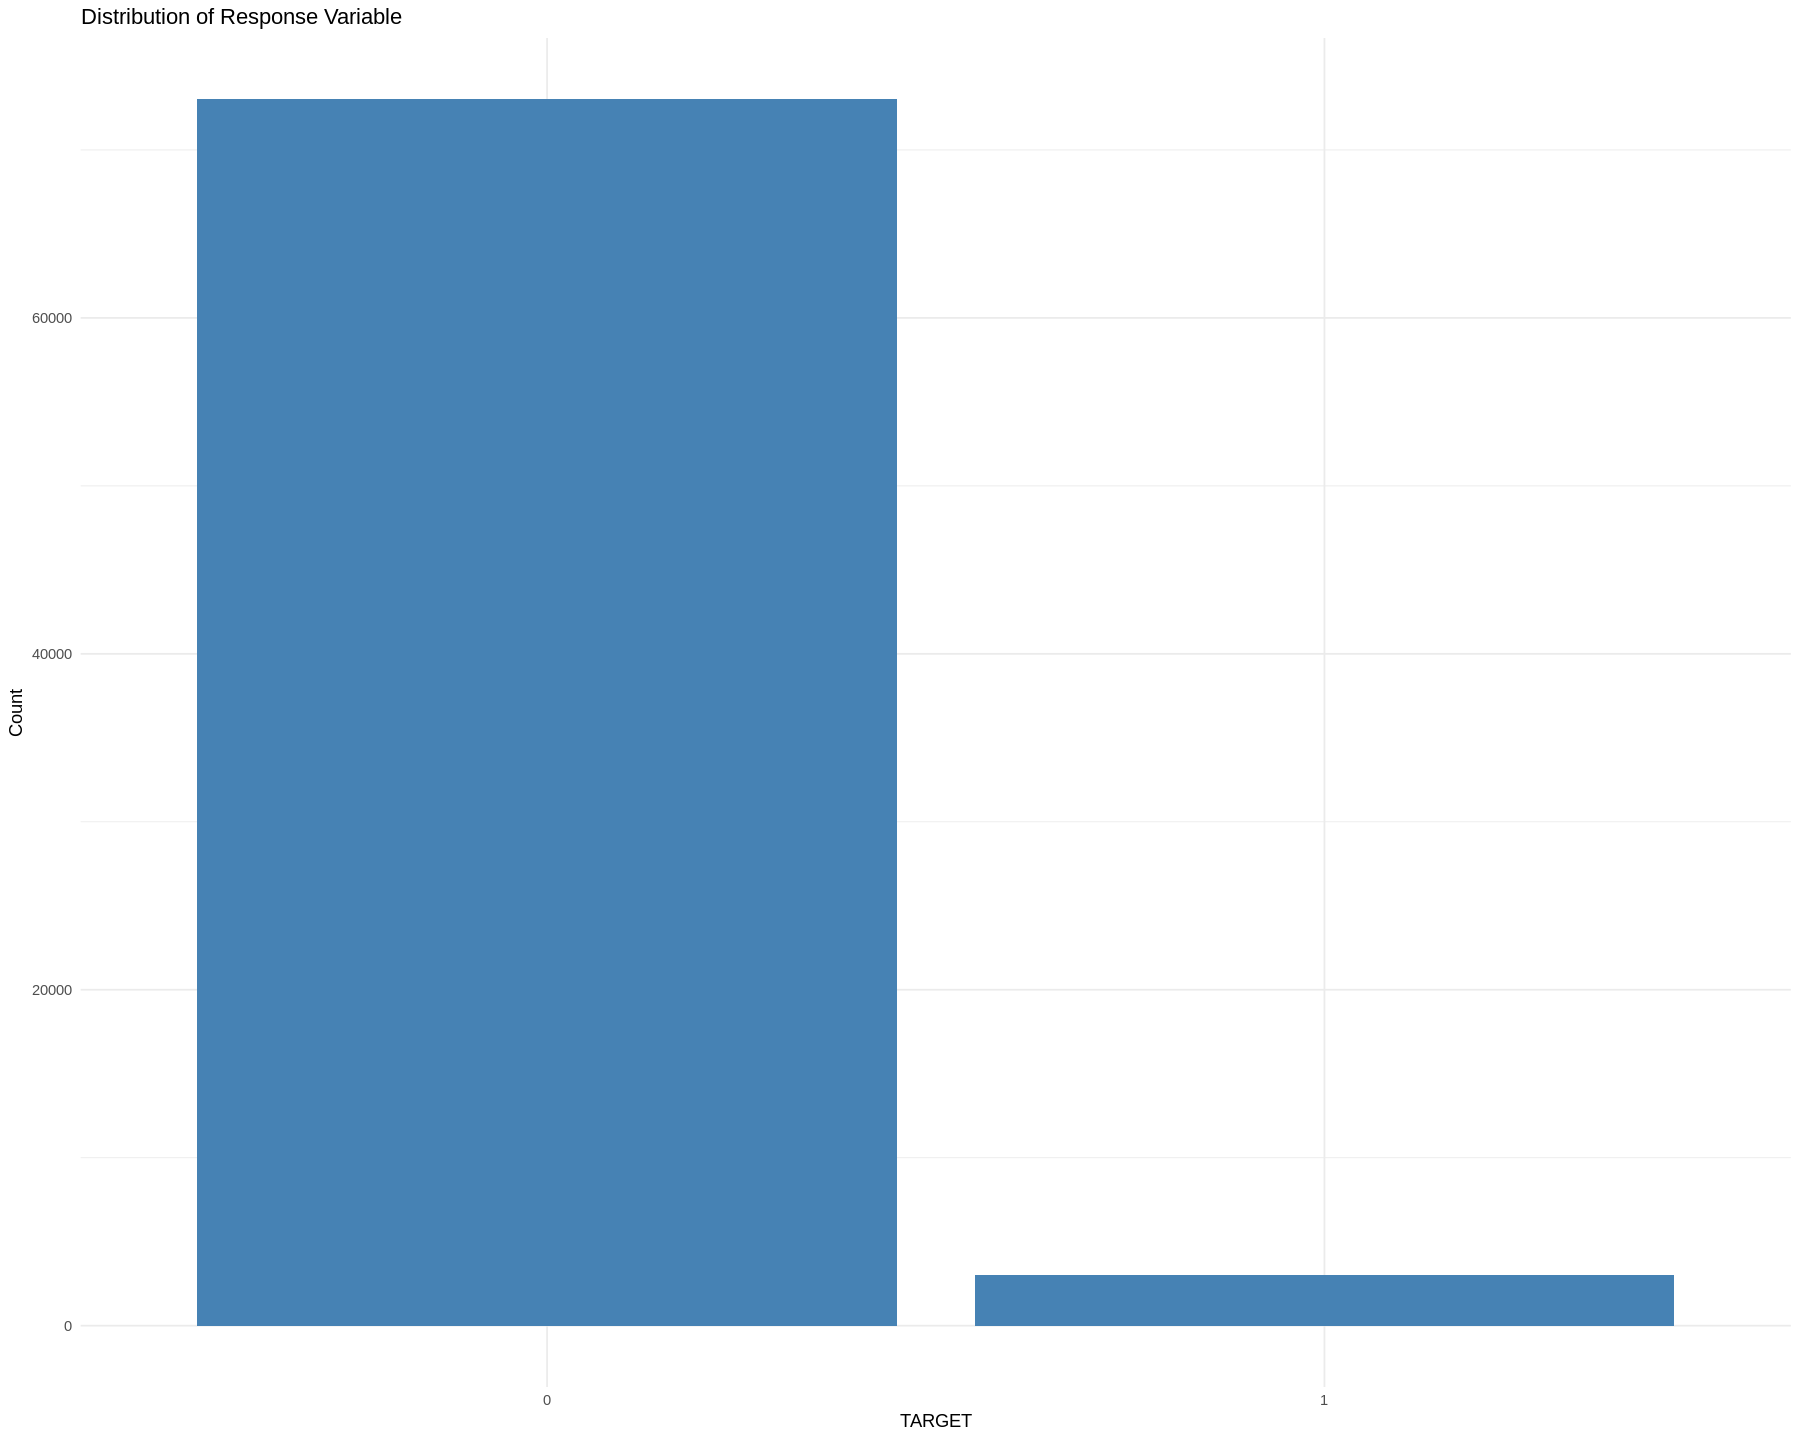

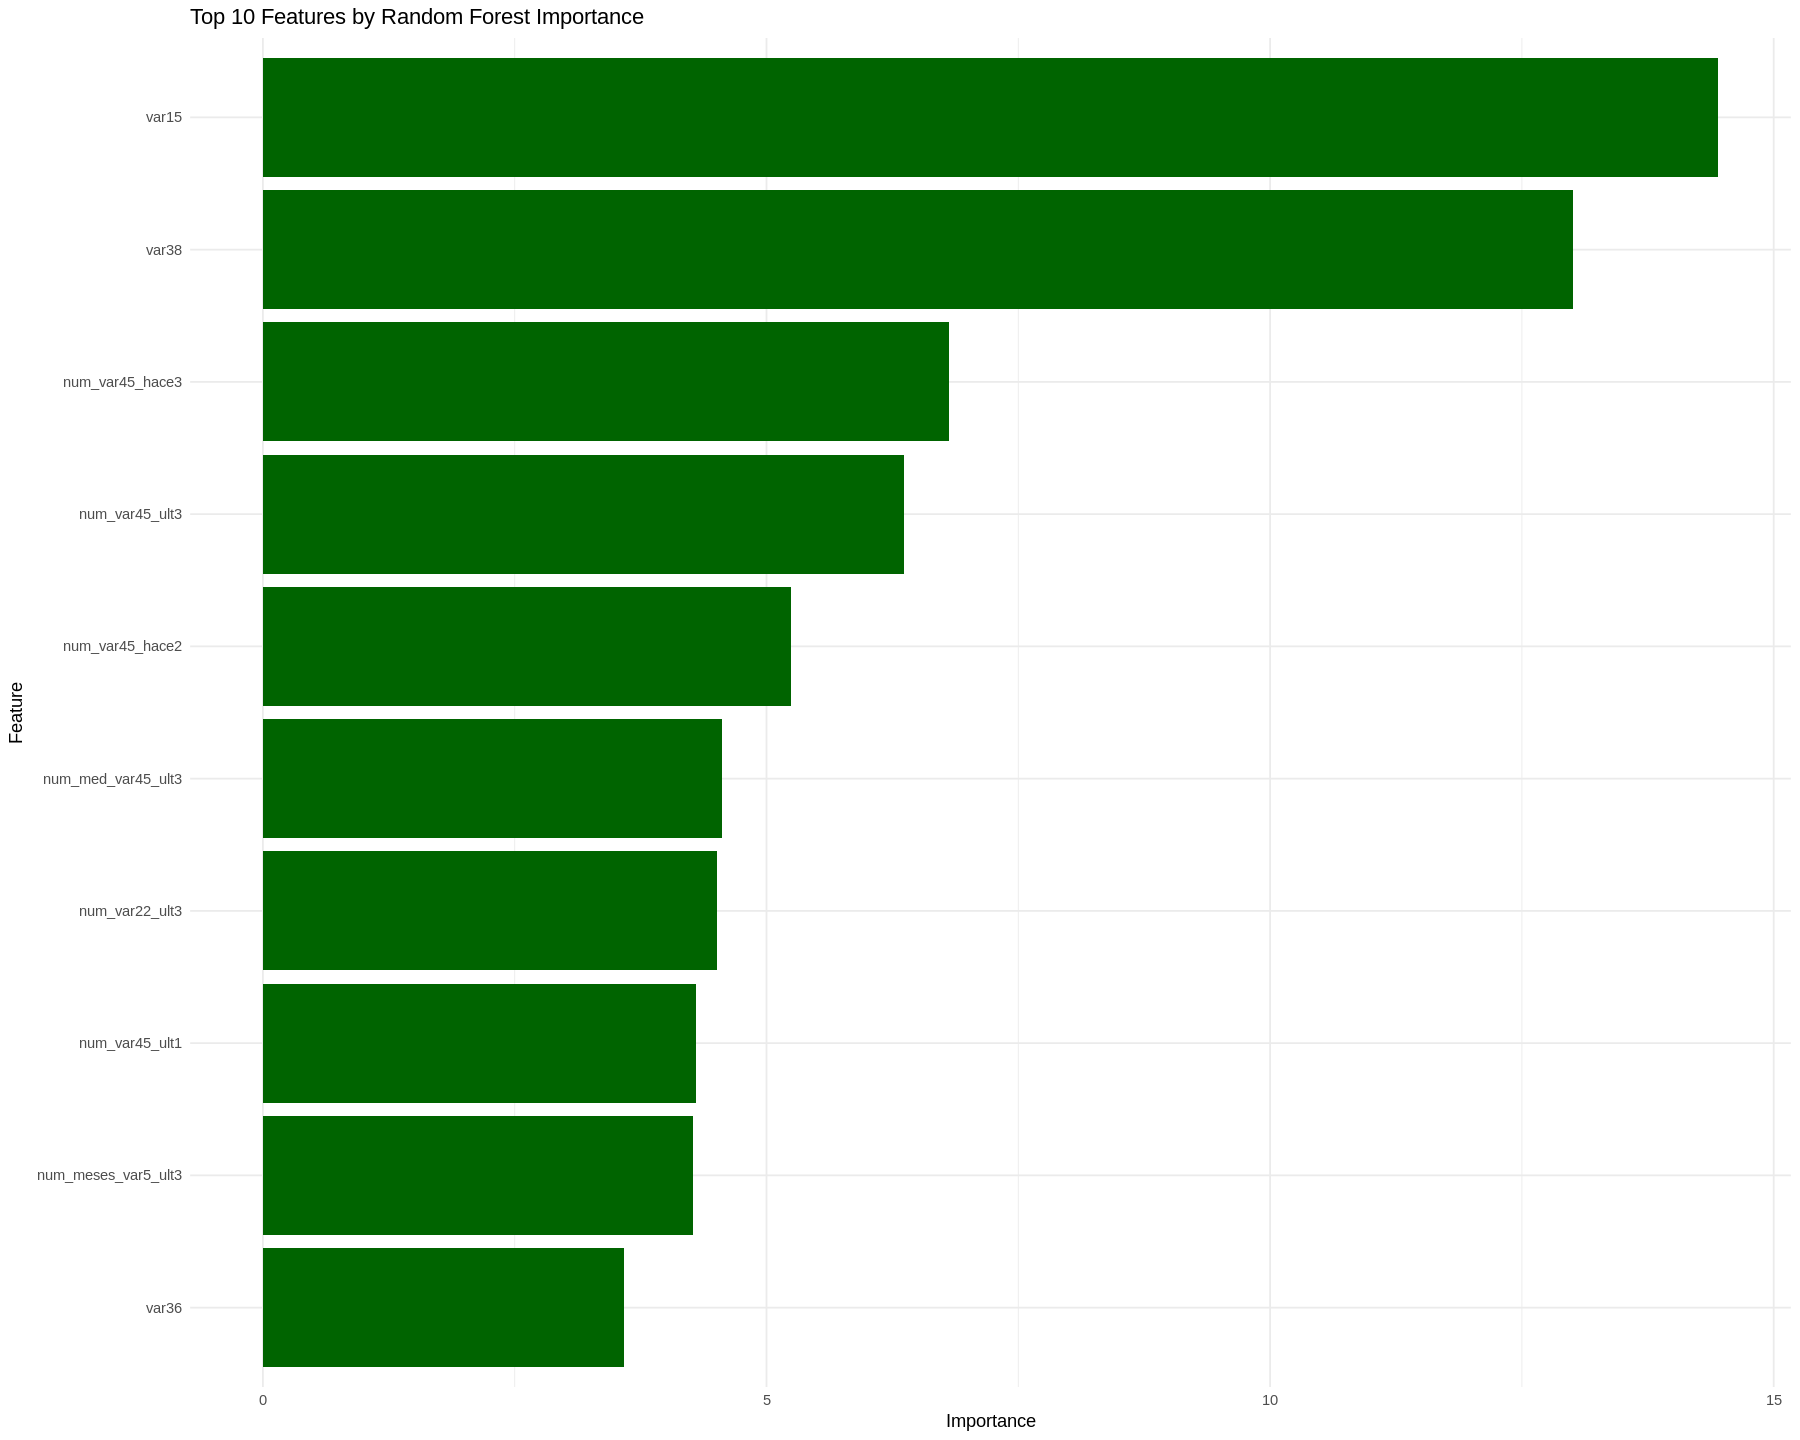

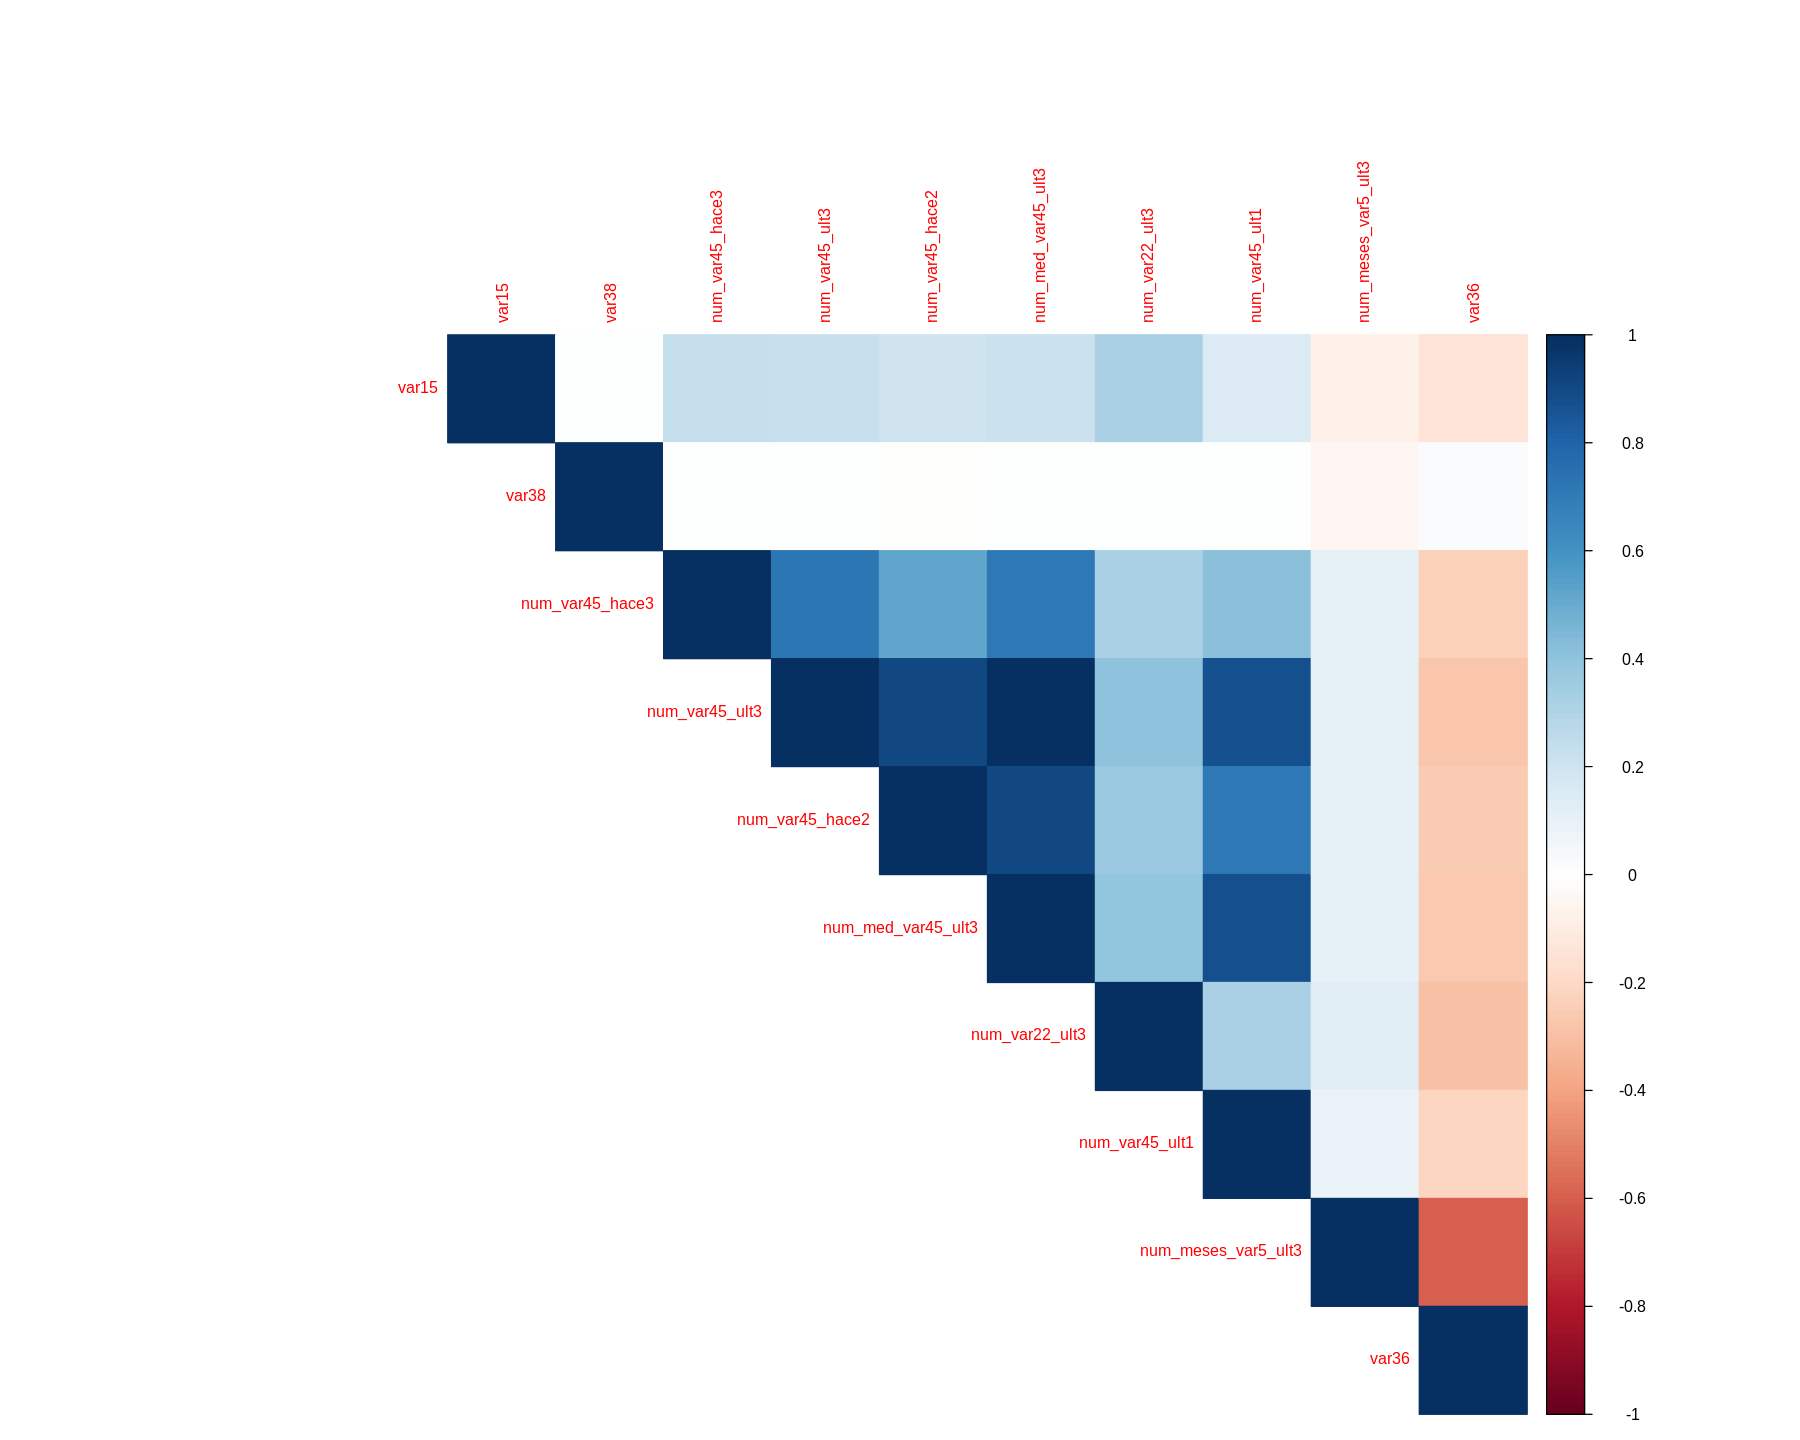

In [ ]:
# 1. Distribution of the Target (TARGET)
ggplot(df_train, aes(x = factor(TARGET))) +
  geom_bar(fill = "steelblue") +
  labs(x = "TARGET", y = "Count", title = "Distribution of Response Variable") +
  theme_minimal()

# 2. Top Variable(s) by Feature Importance (from a model)
library(randomForest)

set.seed(42)
sampled <- df_train[sample(nrow(df_train), 5000), ]  # subsample for speed
rf <- randomForest(factor(TARGET) ~ ., data = sampled[, c("TARGET", grep("^var|^ind|^num", names(sampled), value = TRUE))], ntree = 100, importance = TRUE)
imp <- importance(rf)
imp_df <- data.frame(Feature = rownames(imp), Importance = imp[, "MeanDecreaseGini"])
top_vars <- head(imp_df[order(-imp_df$Importance), ], 10)

ggplot(top_vars, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_col(fill = "darkgreen") +
  coord_flip() +
  labs(title = "Top 10 Features by Random Forest Importance", x = "Feature", y = "Importance") +
  theme_minimal()

# 5. Correlation Matrix of Top Features
library(corrplot)
cor_matrix <- cor(df_train[, top_vars$Feature])
corrplot(cor_matrix, method = "color", type = "upper", tl.cex = 0.8)

## Visualizing the Distribution of Satisfied Customers (0) VS Dissatisfied Customers (1) in training set

[1] "Target Distribution:"
            Target Count Percentage
1    Satisfied (0) 73012  96.043147
2 Dissatisfied (1)  3008   3.956853


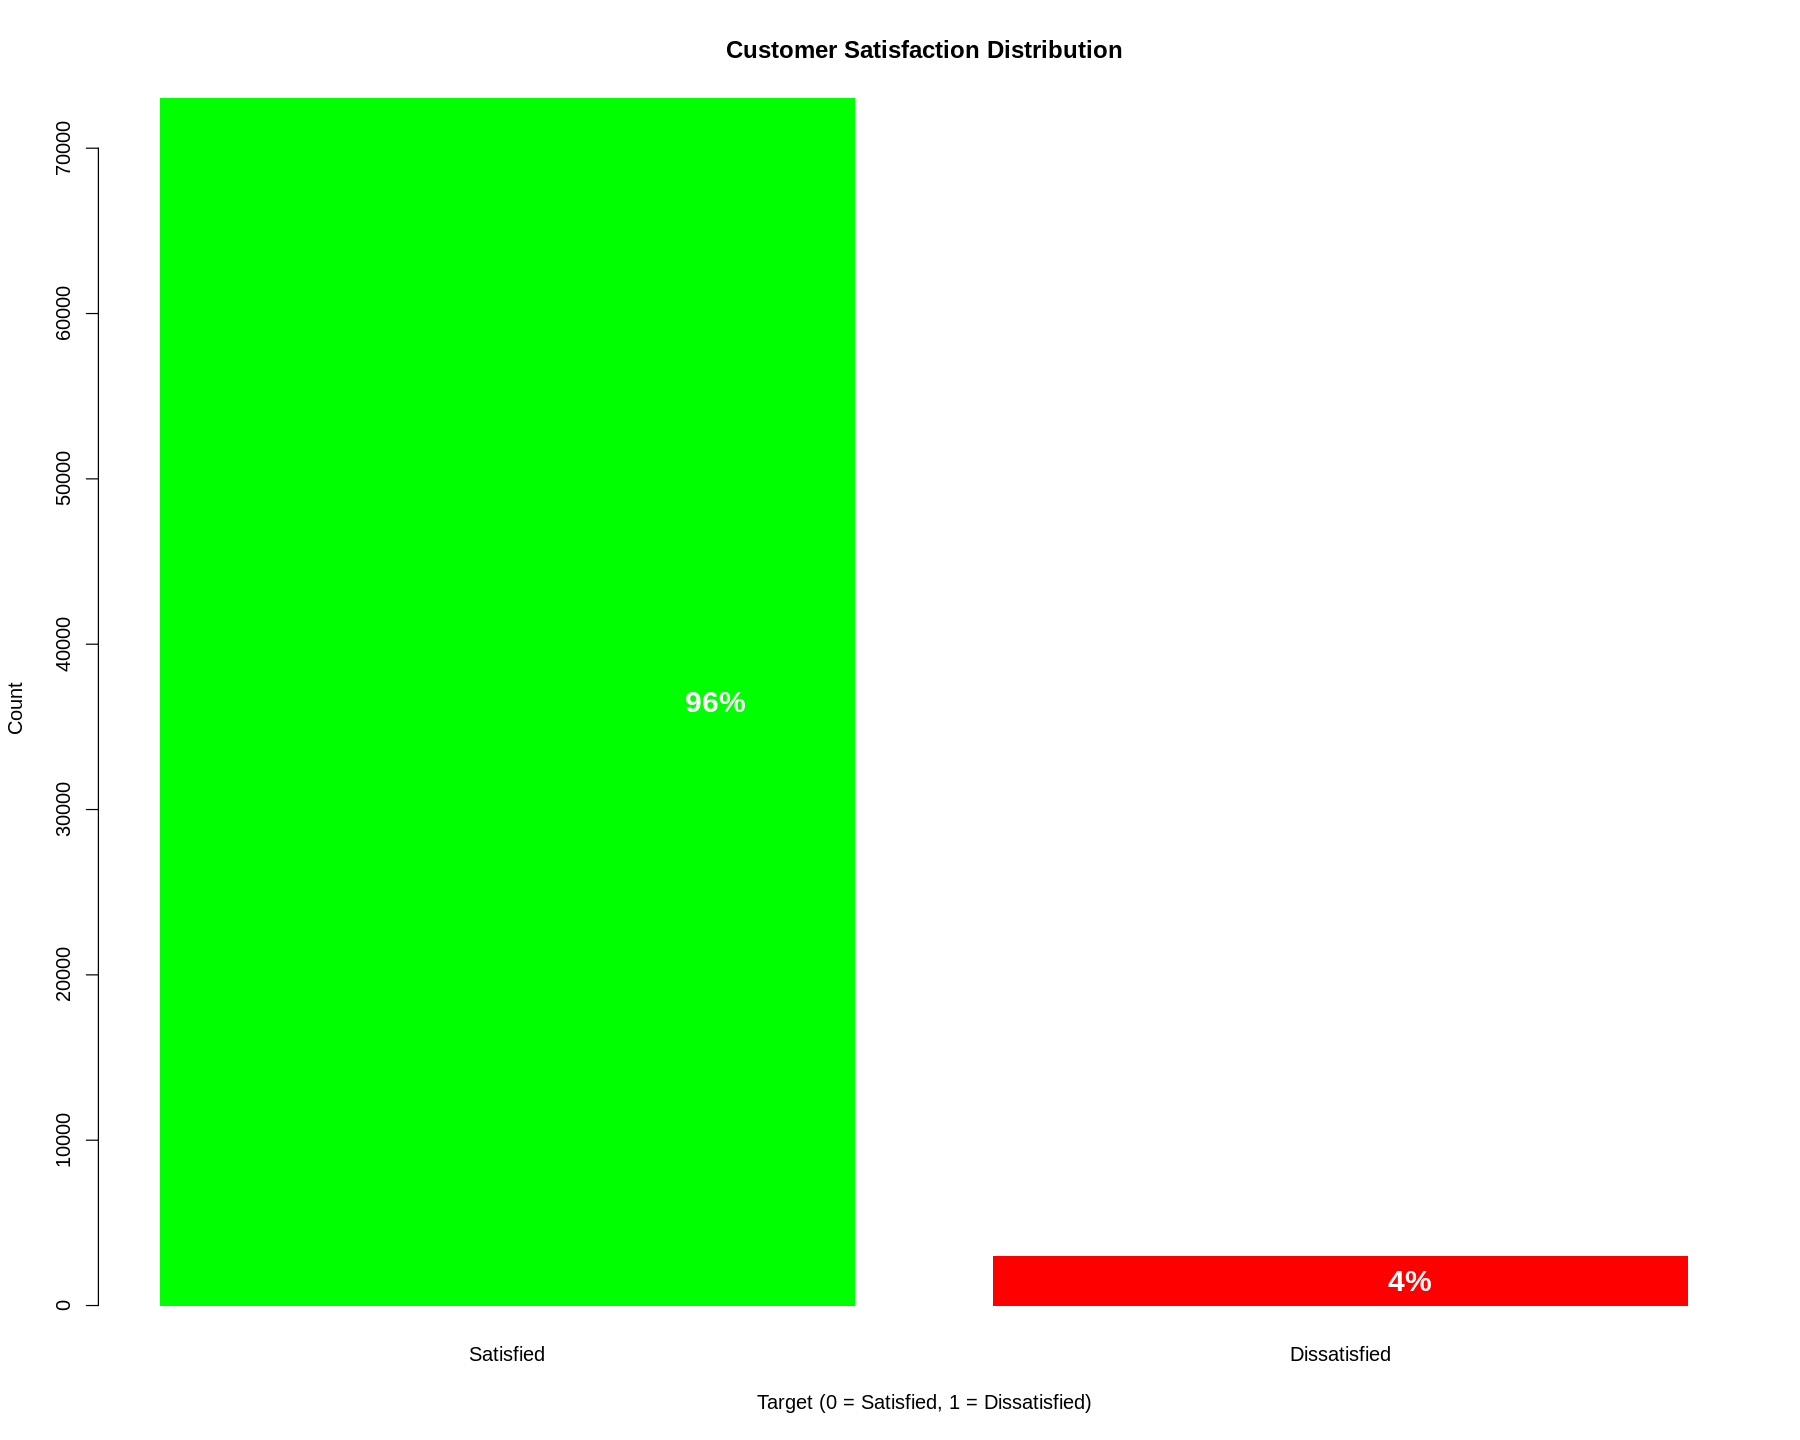

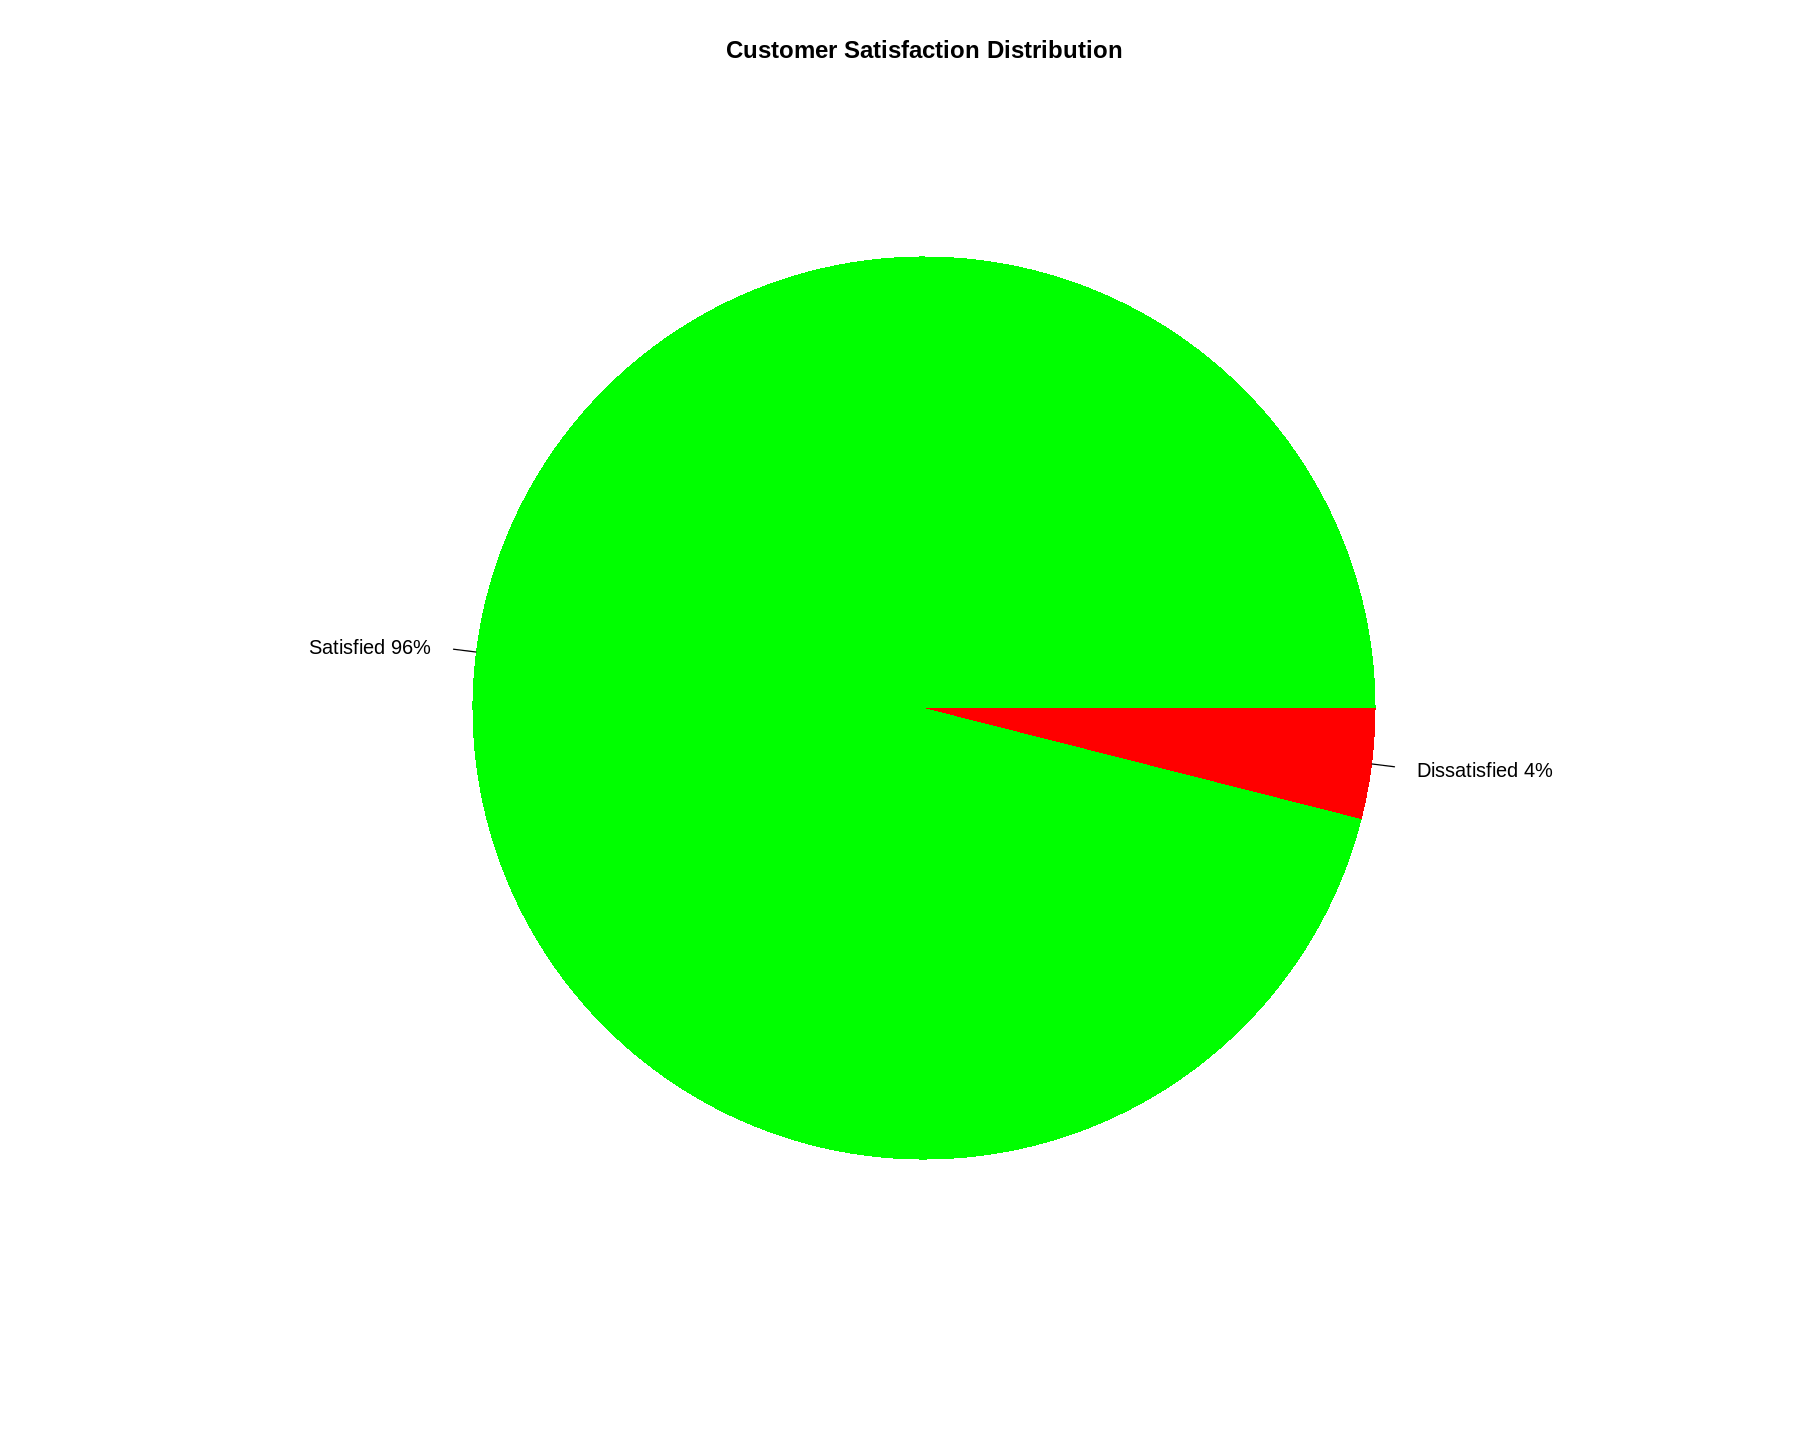

In [ ]:
# Get the count of each target value (0 = satisfied, 1 = dissatisfied)
target_counts <- table(df_train$TARGET)

# Calculate percentages
target_pct <- prop.table(target_counts) * 100

# Create a df for plotting purposes
target_df <- data.frame(
  Target = c("Satisfied (0)", "Dissatisfied (1)"),
  Count = as.numeric(target_counts),
  Percentage = as.numeric(target_pct)
)

# Print the counts and percentages
print("Target Distribution:")
print(target_df)

# Bar plot for visualization
barplot(target_counts,
        main = "Customer Satisfaction Distribution",
        xlab = "Target (0 = Satisfied, 1 = Dissatisfied)",
        ylab = "Count",
        names.arg = c("Satisfied", "Dissatisfied"),
        col = c("green", "red"),
        border = NA)  # No border for cleaner look

# Add percentages to the bar plot with white text
text(x = 1:length(target_counts),
     y = target_counts/2,
     labels = paste0(round(target_pct, 1), "%"),
     col = "white",
     font = 2,
     cex = 1.5)  # Larger text size for better visibility

# New plot for the pie chart
par(new = FALSE)
# Create pie chart
pie(target_counts,
    labels = paste0(c("Satisfied ", "Dissatisfied "), round(target_pct, 1), "%"),
    col = c("green", "red"),
    main = "Customer Satisfaction Distribution",
    border = NA)  # No border for cleaner look

# Print class imbalance ratio
imbalance_ratio <- max(target_counts) / min(target_counts)
## print(paste("Class imbalance ratio:", round(imbalance_ratio, 2)))

# Reset parameters to default
par(col.main = "black", col.axis = "black", col.lab = "black", fg = "black", bg = "white")

# Data Preprocessing Steps

## 1. Remove ID & Target Column from processing
## 2. Look & Remove duplicate columns
## 3. Removed constant columns
## 4. Removed higly correlated columns (c > 0.90)
## 5. Normalize Dataset (Only for KNN)

## Remove **ID** & **Target** Columns from preprocessing

In [ ]:
target <- df_train$TARGET # Extract TARGET into a separate variable
id_cols <- c("ID") # Define ID column
df_train_noconst <- df_train[, !(colnames(df_train) %in% c(id_cols, "TARGET"))]
df_test_noconst <- df_test[, !(colnames(df_test) %in% c("ID"))]

## Check & Remove **Duplicate** Columns

In [ ]:
# Transpose the training data
df_train_transposed <- t(df_train_noconst)

# Find duplicated rows (i.e., duplicate columns)
duplicated_cols <- duplicated(df_train_transposed)

# Extract names of duplicated columns
duplicated_features <- rownames(df_train_transposed)[duplicated_cols]

cat("Number of Duplicate Columns:", length(duplicated_features), "\n")
print(duplicated_features)

# Keep only non-duplicated columns
columns_to_keep <- !duplicated(df_train_transposed)
df_train_no_duplicates <- df_train_noconst[, columns_to_keep]

# Apply same column filter to test set
df_test_no_duplicates <- df_test_noconst[, colnames(df_train_no_duplicates)]

# Print dimensions
cat("TRAIN Original dimensions:", dim(df_train_noconst)[1], "rows x", dim(df_train_noconst)[2], "columns\n")
cat("TRAIN Dimensions after removing duplicates:", dim(df_train_no_duplicates)[1], "rows x", dim(df_train_no_duplicates)[2], "columns\n")
cat("TEST  Dimensions after removing duplicates:", dim(df_test_no_duplicates)[1], "rows x", dim(df_test_no_duplicates)[2], "columns\n")

Number of Duplicate Columns: 62 
 [1] "ind_var2"                      "ind_var13_medio"              
 [3] "ind_var18"                     "ind_var26"                    
 [5] "ind_var25"                     "ind_var27_0"                  
 [7] "ind_var28_0"                   "ind_var28"                    
 [9] "ind_var27"                     "ind_var29_0"                  
[11] "ind_var29"                     "ind_var32"                    
[13] "ind_var34"                     "ind_var37"                    
[15] "ind_var41"                     "ind_var39"                    
[17] "ind_var46_0"                   "ind_var46"                    
[19] "num_var13_medio"               "num_var18"                    
[21] "num_var26"                     "num_var25"                    
[23] "num_var27_0"                   "num_var28_0"                  
[25] "num_var28"                     "num_var27"                    
[27] "num_var29_0"                   "num_var29"                    
[

## Check & Remove **Constant** Columns

In [ ]:
# Identify constant columns (columns with only one unique value)
constant_cols <- sapply(df_train_no_duplicates, function(x) length(unique(x)) == 1)

# Remove constant columns from training set
df_train_rmv_cc <- df_train_no_duplicates[, !constant_cols]

# Apply same column filtering to test set
df_test_rmv_cc <- df_test_no_duplicates[, colnames(df_train_rmv_cc)]

# Print dimensions
cat("TRAIN dimensions no dupes:", dim(df_train_no_duplicates)[1], "rows x", dim(df_train_no_duplicates)[2], "columns\n")
cat("TRAIN Dimensions after removing constants:", dim(df_train_rmv_cc)[1], "rows x", dim(df_train_rmv_cc)[2], "columns\n")
cat("TEST  Dimensions after removing constants:", dim(df_test_rmv_cc)[1], "rows x", dim(df_test_rmv_cc)[2], "columns\n")

TRAIN dimensions no dupes: 76020 rows x 307 columns
TRAIN Dimensions after removing constants: 76020 rows x 306 columns
TEST  Dimensions after removing constants: 75818 rows x 306 columns


## Check & Remove **Correlated** Columns

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Correlation matrix of numeric features BEFORE removing highly correlated ones:
                        var3 var15 imp_ent_var16_ult1 imp_op_var39_comer_ult1
var3                    1.00  0.00               0.00                    0.01
var15                   0.00  1.00               0.04                    0.09
imp_ent_var16_ult1      0.00  0.04               1.00                    0.04
imp_op_var39_comer_ult1 0.01  0.09               0.04                    1.00
imp_op_var39_comer_ult3 0.01  0.10               0.03                    0.89
imp_op_var40_comer_ult1 0.00  0.04               0.01                    0.34
imp_op_var40_comer_ult3 0.00  0.05               0.01                    0.30
imp_op_var40_efect_ult1 0.00  0.01               0.00                    0.03
imp_op_var40_efect_ult3 0.00  0.01               0.00                    0.05
imp_op_var40_ult1       0.00  0.04               0.01                    0.25
                        imp_op_var39_comer_ult3 imp_op_var40_c

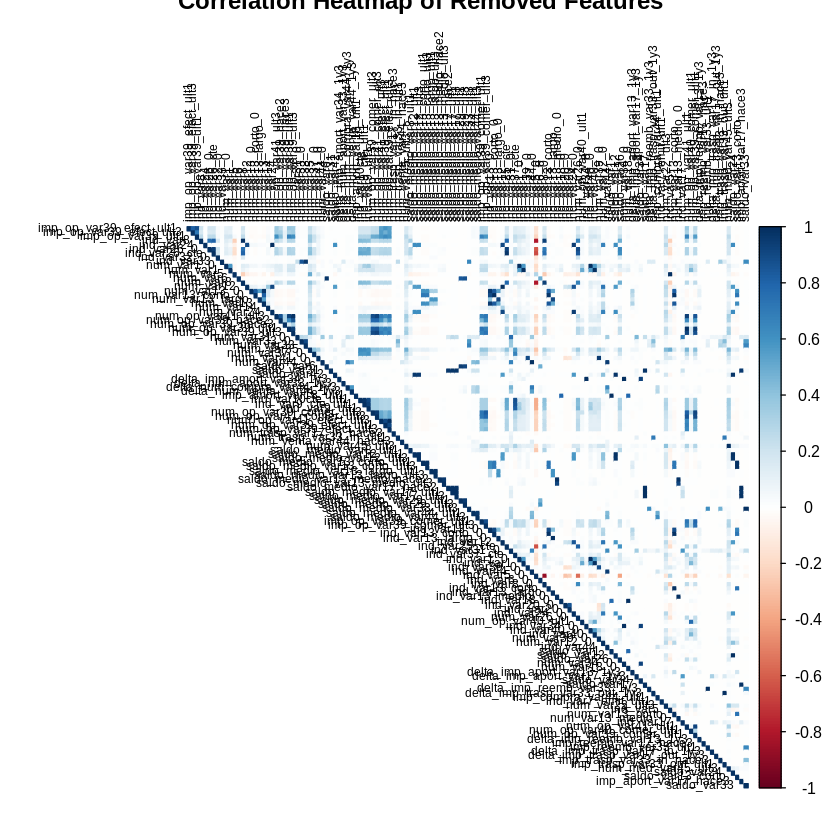

In [ ]:
# Install corrplot if not already installed
install.packages("corrplot")
library(corrplot)

# 1. Identify numeric columns and compute correlation matrix
num_cols <- sapply(df_train_rmv_cc, is.numeric)
cor_matrix <- cor(df_train_rmv_cc[, num_cols], use = "pairwise.complete.obs")

# 2. Show partial matrix for preview
cat("\nCorrelation matrix of numeric features BEFORE removing highly correlated ones:\n")
print(round(cor_matrix[1:min(10, ncol(cor_matrix)), 1:min(10, ncol(cor_matrix))], 2))

# 3. Identify highly correlated features
if (!require("caret")) install.packages("caret")
library(caret)

high_cor <- findCorrelation(cor_matrix, cutoff = 0.90, names = TRUE)

# 4. Print results
cat("\nNumber of highly correlated features (r > 0.9):", length(high_cor), "\n")
if (length(high_cor) > 0) {
  cat("Highly correlated features to remove:\n")
  print(high_cor)

  # 5. Plot correlation heatmap of removed features
  corrplot(cor(df_train_rmv_cc[, high_cor], use = "pairwise.complete.obs"),
           method = "color", type = "upper",
           tl.cex = 0.6, tl.col = "black",
           title = "Correlation Heatmap of Removed Features")

  # 6. Drop highly correlated features from train
  df_train_preprocessed <- df_train_rmv_cc[, !(names(df_train_rmv_cc) %in% high_cor)]

  # 7. Apply same column removal to test set
  df_test_preprocessed <- df_test_rmv_cc[, colnames(df_train_preprocessed)]

} else {
  df_train_preprocessed <- df_train_rmv_cc
  df_test_preprocessed <- df_test_rmv_cc
  cat("No features removed.\n")
}

## Processed dataset: df_train_preprocessed

In [ ]:
# 7. Print dimensions
cat("\nTRAIN Before correlation removal:", dim(df_train_rmv_cc)[1], "rows x", dim(df_train_rmv_cc)[2], "columns\n")
cat("TRAIN After correlation removal:", dim(df_train_preprocessed)[1], "rows x", dim(df_train_preprocessed)[2], "columns\n")
cat("TEST  After correlation removal:", dim(df_test_preprocessed)[1], "rows x", dim(df_test_preprocessed)[2], "columns\n")

ERROR: Error: object 'df_train_rmv_cc' not found


## Normalize dataset for KNN only

In [ ]:
# Load caret if not already loaded
if (!require("caret")) install.packages("caret")
library(caret)

# We're now standardizing based on df_train_preprocessed
preproc <- preProcess(df_train_preprocessed, method = c("center", "scale"))

# Apply normalization to both train and test
df_train_normalized <- predict(preproc, df_train_preprocessed)
df_test_normalized <- predict(preproc, df_test_preprocessed)

cat("Normalization complete: 'df_train_normalized' and 'df_test_normalized' are ready.\n")

Normalization complete: 'df_train_normalized' and 'df_test_normalized' are ready.


## Testing if Train and Test have the exact same columns

In [ ]:
stopifnot(identical(colnames(df_train_preprocessed), colnames(df_test_preprocessed)))

# Correlation matrix

Removed 134 correlated features


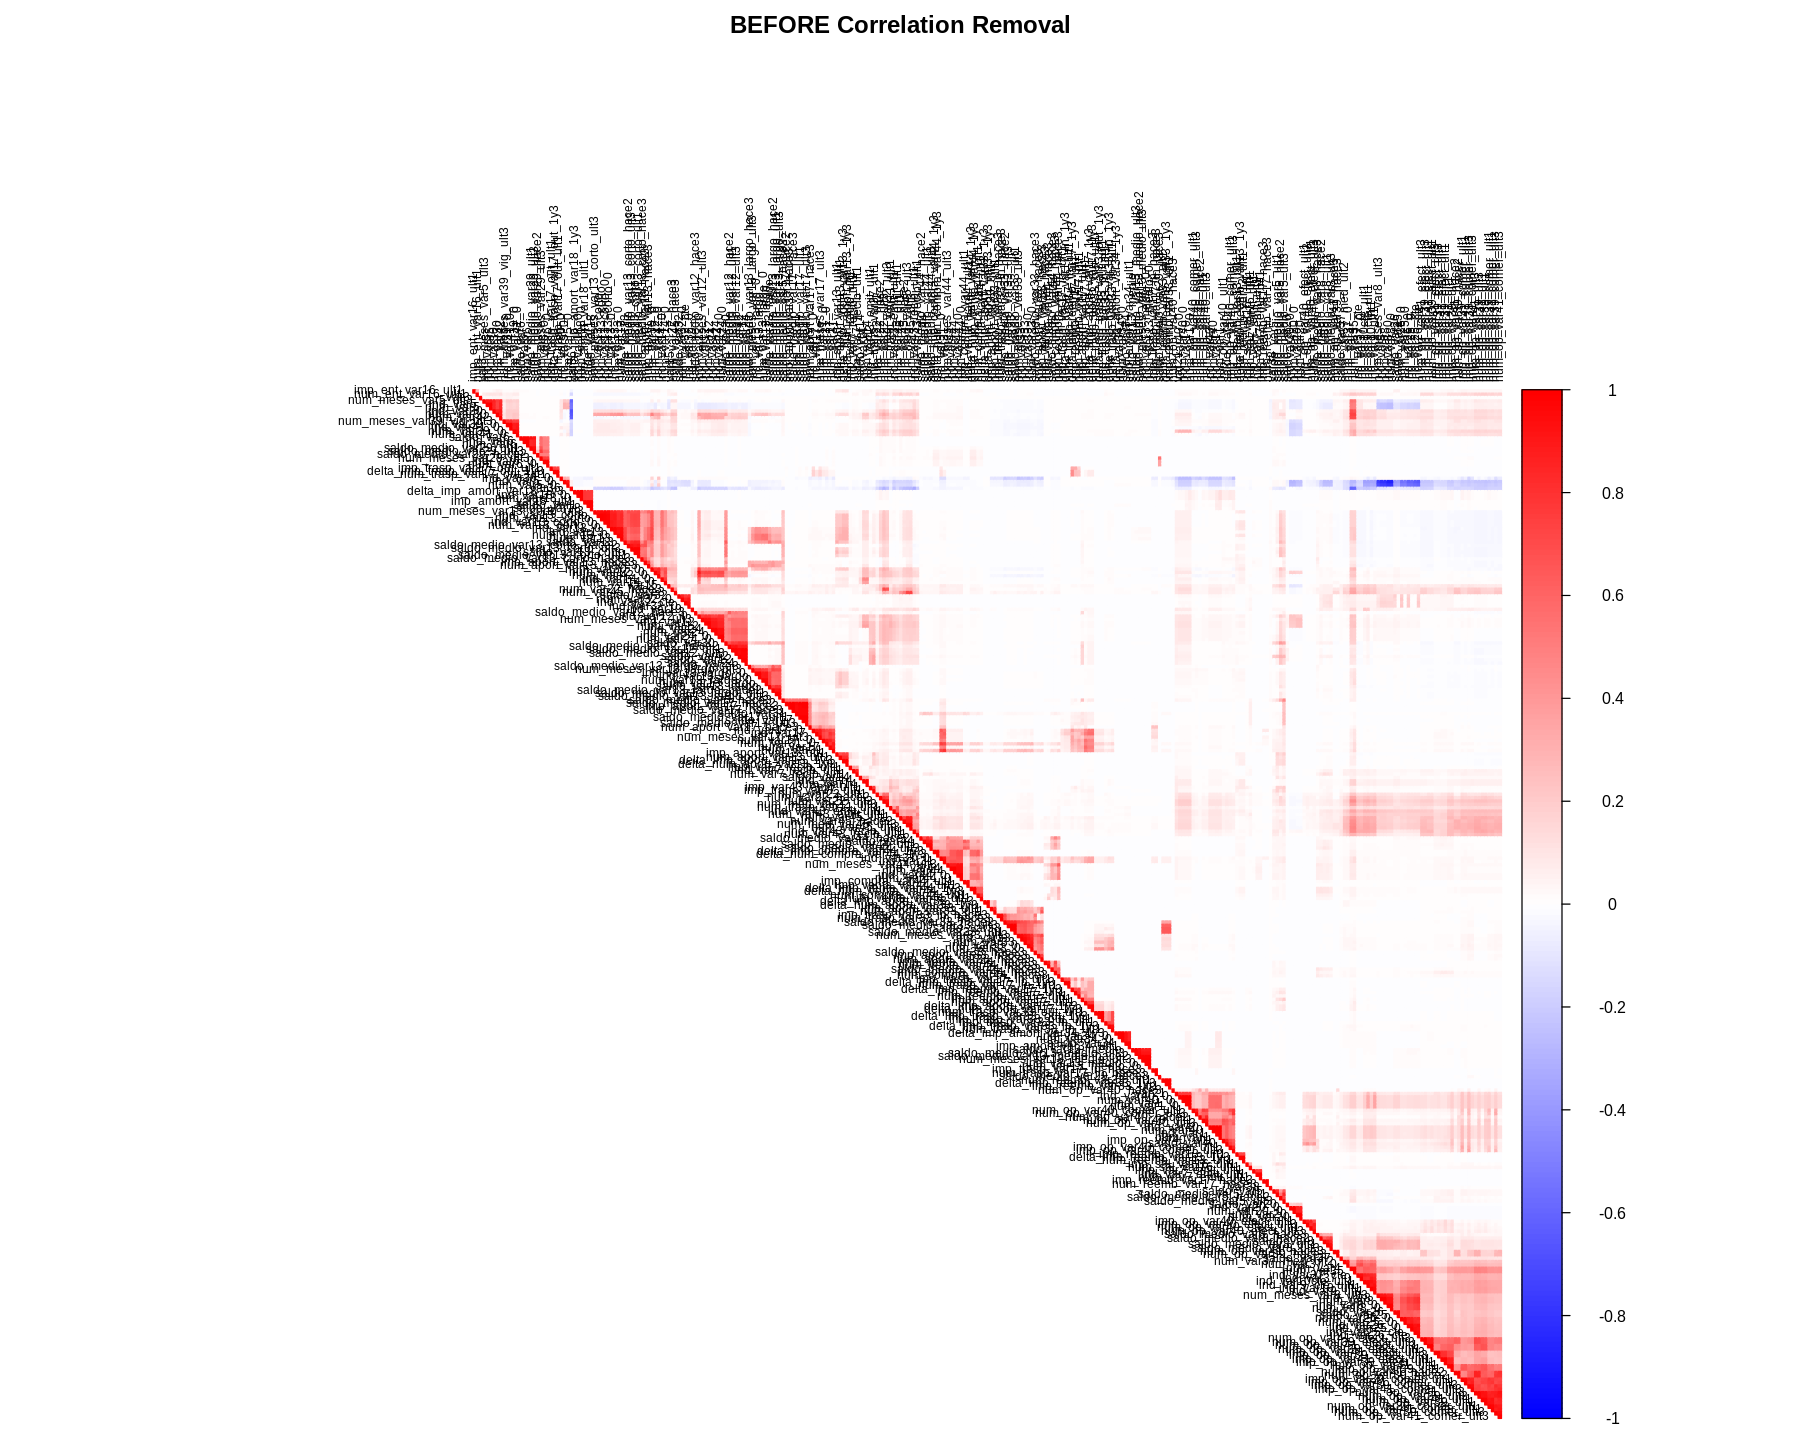

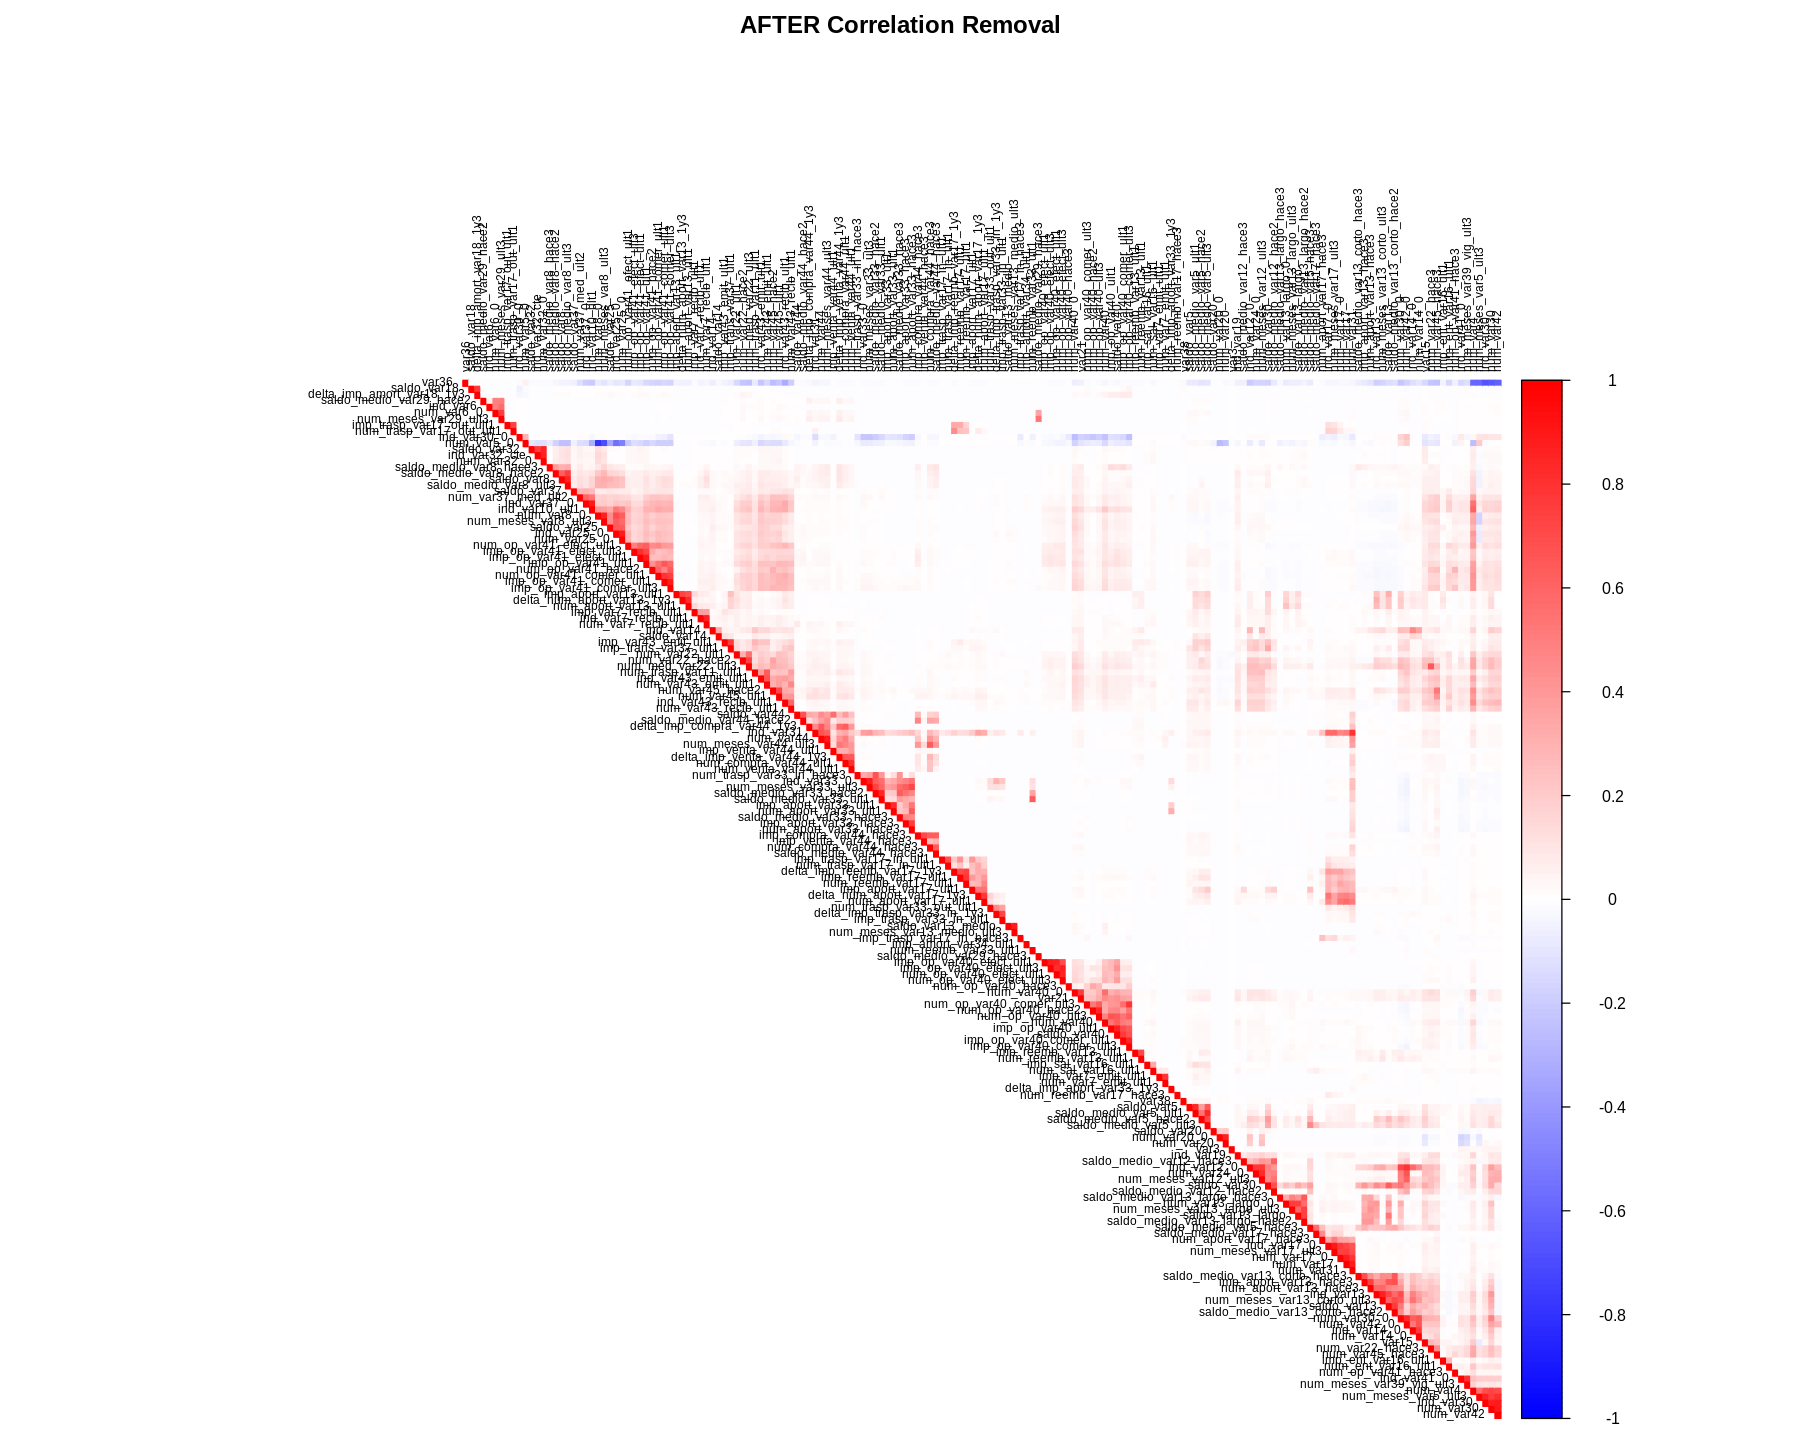

In [ ]:
# A. BEFORE — correlation matrix of df_train_rmv_cc
num_cols_before <- sapply(df_train_rmv_cc, is.numeric)
cor_before <- cor(df_train_rmv_cc[, num_cols_before], use = "pairwise.complete.obs")

# Plot 1: Before heatmap
corrplot(cor_before,
         method = "color",
         type = "upper",
         order = "hclust",
         tl.cex = 0.6,
         tl.col = "black",
         col = colorRampPalette(c("blue", "white", "red"))(200),
         mar = c(0, 0, 2, 0),
         title = "BEFORE Correlation Removal")

# B. Remove correlated features
high_cor <- findCorrelation(cor_before, cutoff = 0.9, names = TRUE)

df_train_preprocessed <- df_train_rmv_cc[, !(names(df_train_rmv_cc) %in% high_cor)]
# df_test_preprocessed  <- df_test_rmv_cc[, !(names(df_test_rmv_cc) %in% high_cor)]

cat("Removed", length(high_cor), "correlated features\n")

# C. AFTER — correlation matrix of cleaned data
num_cols_after <- sapply(df_train_preprocessed, is.numeric)
cor_after <- cor(df_train_preprocessed[, num_cols_after], use = "pairwise.complete.obs")

# Plot 2: After heatmap
corrplot(cor_after,
         method = "color",
         type = "upper",
         order = "hclust",
         tl.cex = 0.6,
         tl.col = "black",
         col = colorRampPalette(c("blue", "white", "red"))(200),
         mar = c(0, 0, 2, 0),
         title = "AFTER Correlation Removal")

# Testing ML Models
- CART (Accuracy)
- Random Forest
- KNN
- XGBOOST

## Each model is evaluated using
3 metrics -> F1 Score, ROC AUC (Plot + value)

## Each model has visualizations
- ROC

## Each model has a downsampled model

## Training/validation split Logic

In [ ]:
# Create stratified train/test split (80% train, 20% validation)
library(caret)
set.seed(123)  # For reproducibility

trainIndex <- createDataPartition(target, p = 0.8, list = FALSE)

X_train <- df_train_preprocessed[trainIndex, ]
X_valid <- df_train_preprocessed[-trainIndex, ]
y_train <- target[trainIndex]
y_valid <- target[-trainIndex]

## Cart Model

Class distribution after downsampling:

   0    1 
2400 2400 


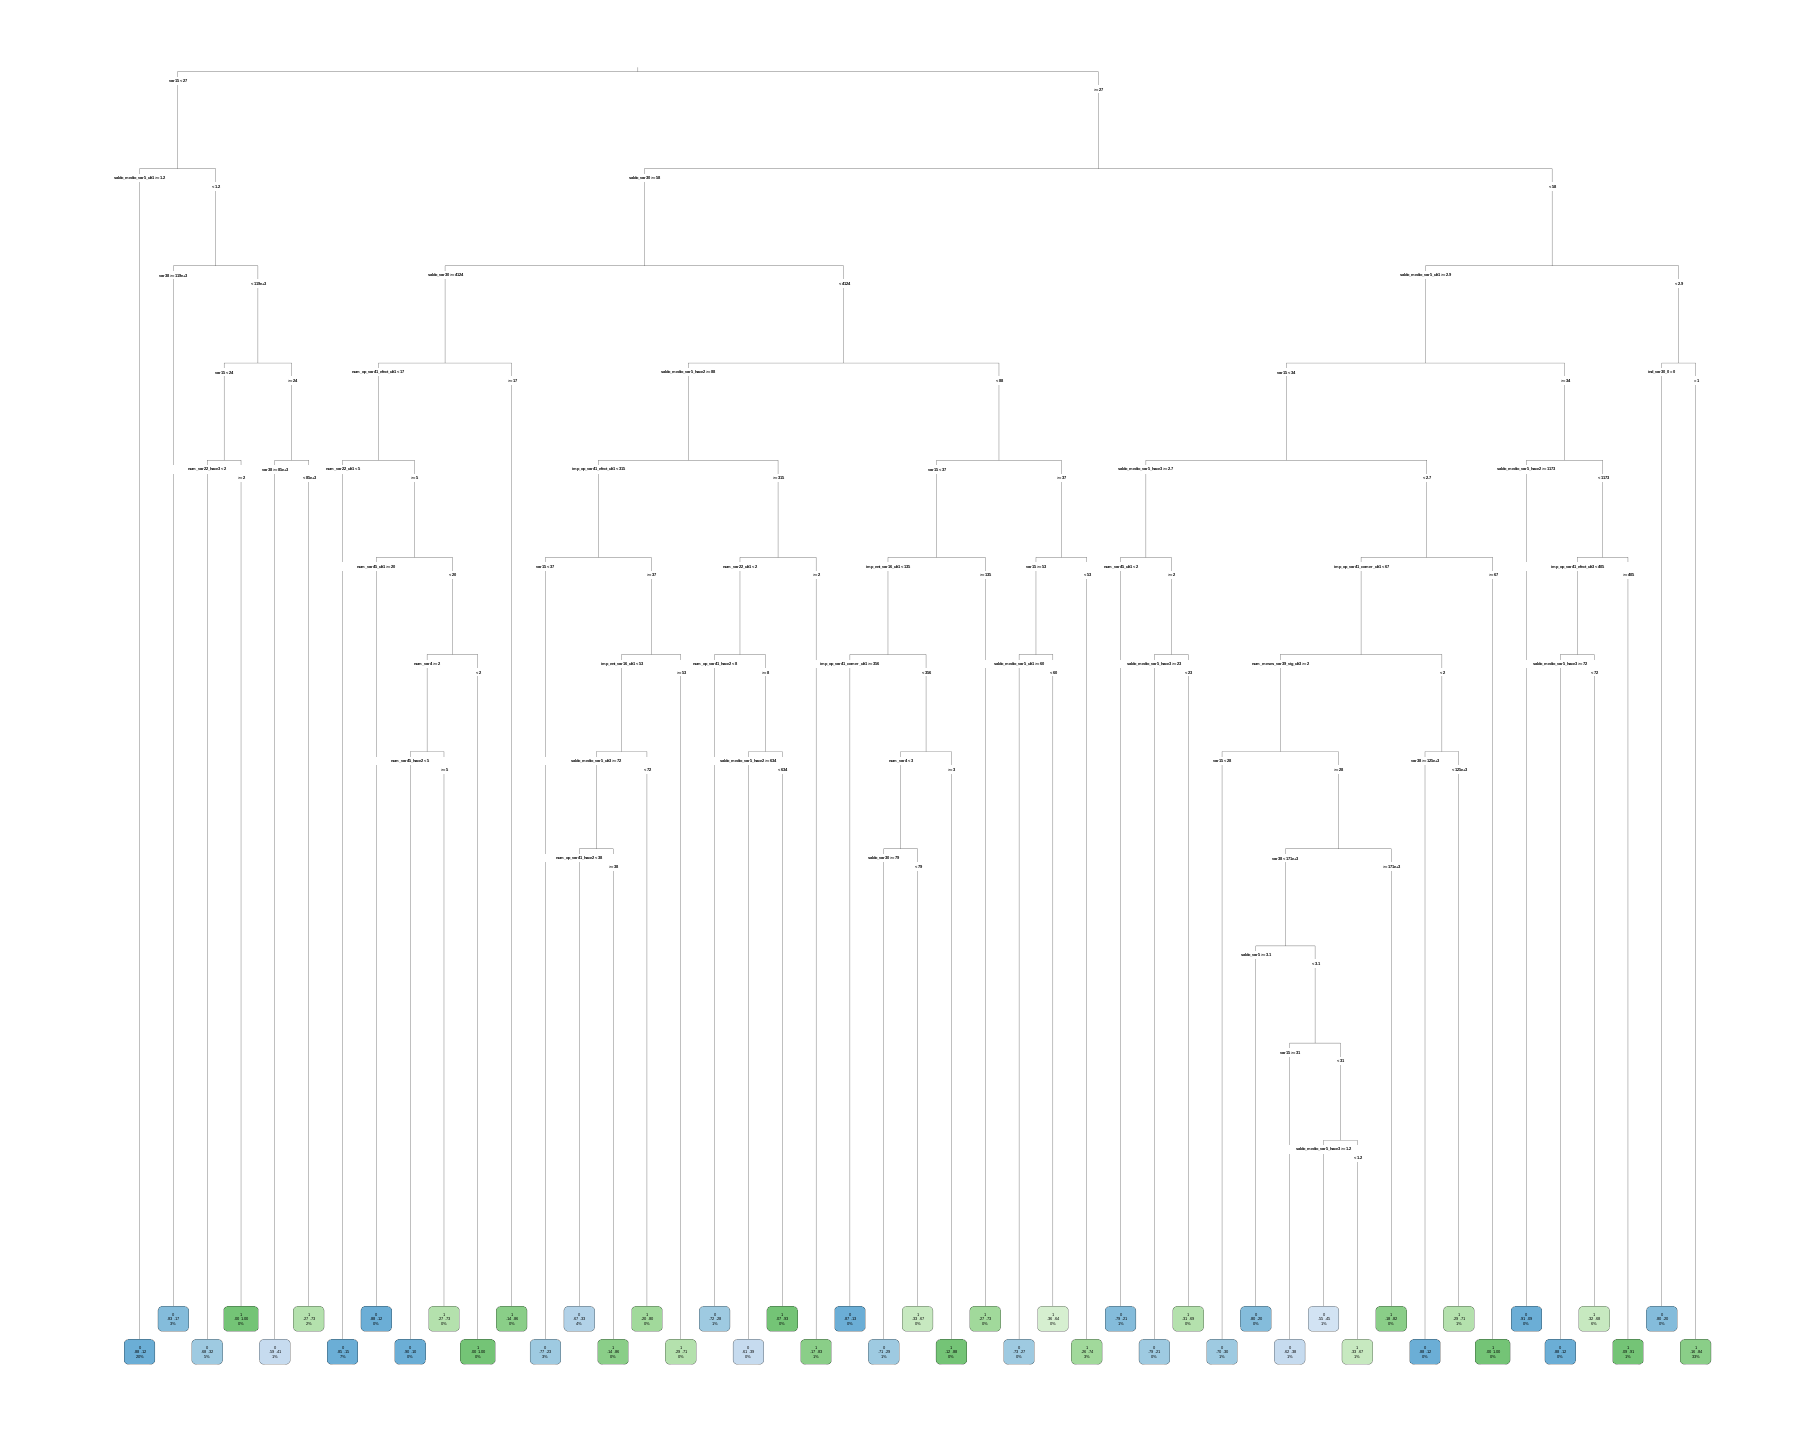

In [ ]:
library(rpart)
library(rpart.plot)
library(caret)

# Downsample the majority class for CART only ----------------
set.seed(123)

# Make a safe copy of features and labels for CART
X_cart <- X_train
y_cart <- y_train

# Use caret to downsample (creates a new balanced dataset)
balanced_data <- downSample(x = X_cart, y = as.factor(y_cart), yname = "y_cart")

# Check class balance
cat("Class distribution after downsampling:\n")
print(table(balanced_data$y_cart))

# Train CART model on downsampled data -------------------------------
cart_model <- rpart(
  y_cart ~ .,
  data = balanced_data,
  method = "class",
  control = rpart.control(cp = 0.001)  # You can tune cp later
)

# Plot CART
options(repr.plot.width = 15, repr.plot.height = 12)
rpart.plot(cart_model, type = 3, extra = 104, fallen.leaves = TRUE)

### Cart AUC for kaggle

In [ ]:
# Predict probabilities for class 1
cart_valid_probs <- predict(cart_model, newdata = X_valid, type = "prob")[, 2]

# Compute AUC
cart_roc <- roc(y_valid, cart_valid_probs)
cart_auc <- auc(cart_roc)
cat("Validation AUC (CART):", cart_auc, "\n")

# ---------------------------
# Predict on Kaggle test set
# ---------------------------

# Use the same preprocessed test set as before
cart_test_probs <- predict(cart_model, newdata = df_test_clean, type = "prob")[, 2]

# ---------------------------
# Prepare Kaggle submission
# ---------------------------

submission <- df_sample_submission
submission$TARGET <- cart_test_probs

write.csv(submission, "cart_submission.csv", row.names = FALSE)
cat("Submission file 'cart_submission.csv' created successfully.\n")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Validation AUC (CART): 0.8089542 
Submission file 'cart_submission.csv' created successfully.


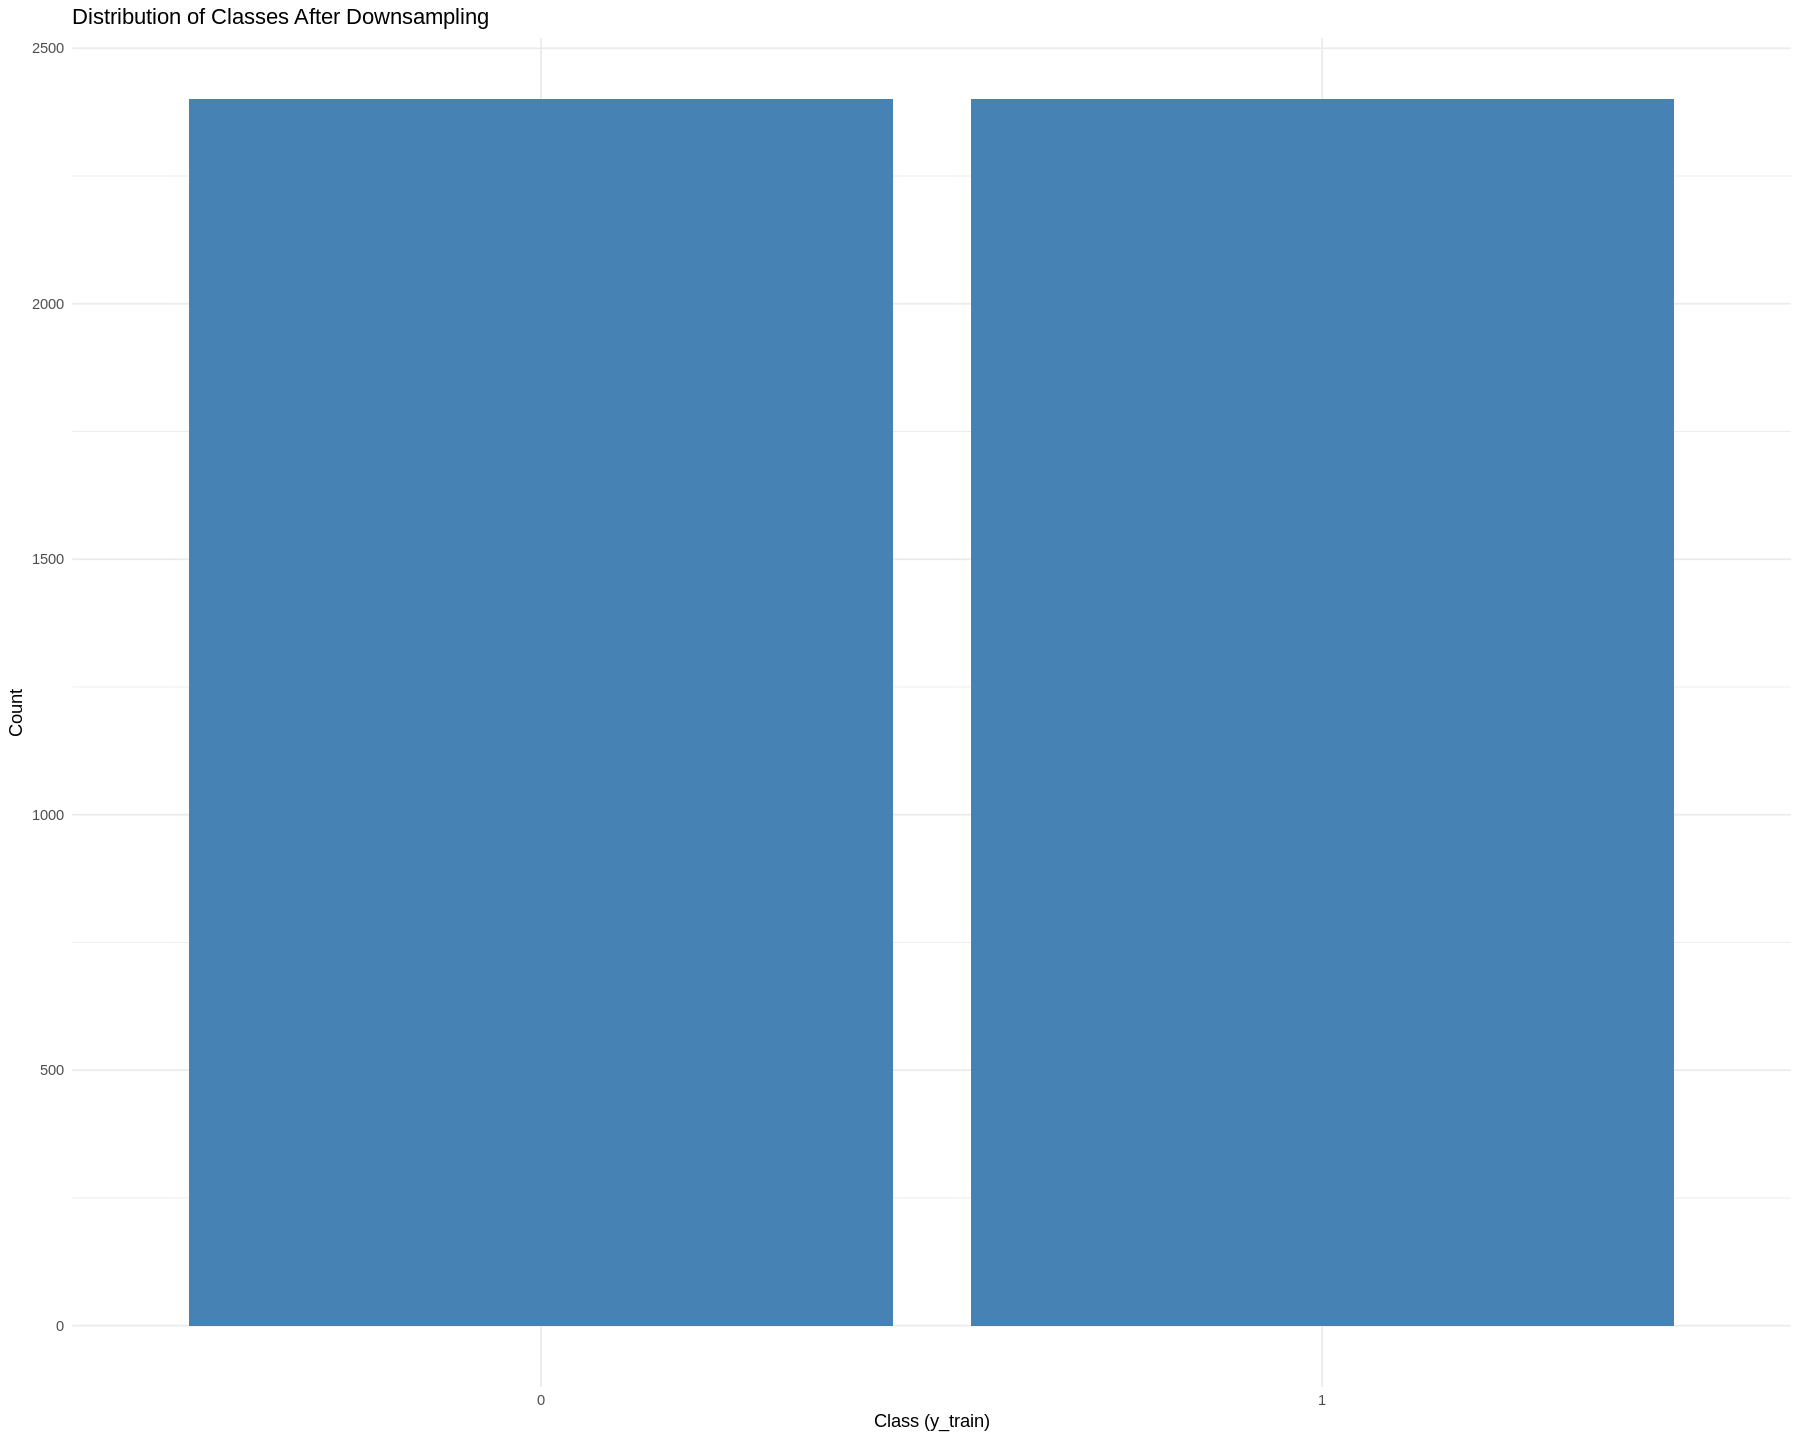

In [ ]:
library(ggplot2)

ggplot(balanced_data, aes(x = y_cart)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Distribution of Classes After Downsampling",
       x = "Class (y_train)", y = "Count") +
  theme_minimal()

### Model Evaluation & ROC Curve for CART

Setting levels: control = 0, case = 1

Setting direction: controls < cases



CART Model Validation AUC: 0.809 
CART Model Validation Accuracy: 0.7474 


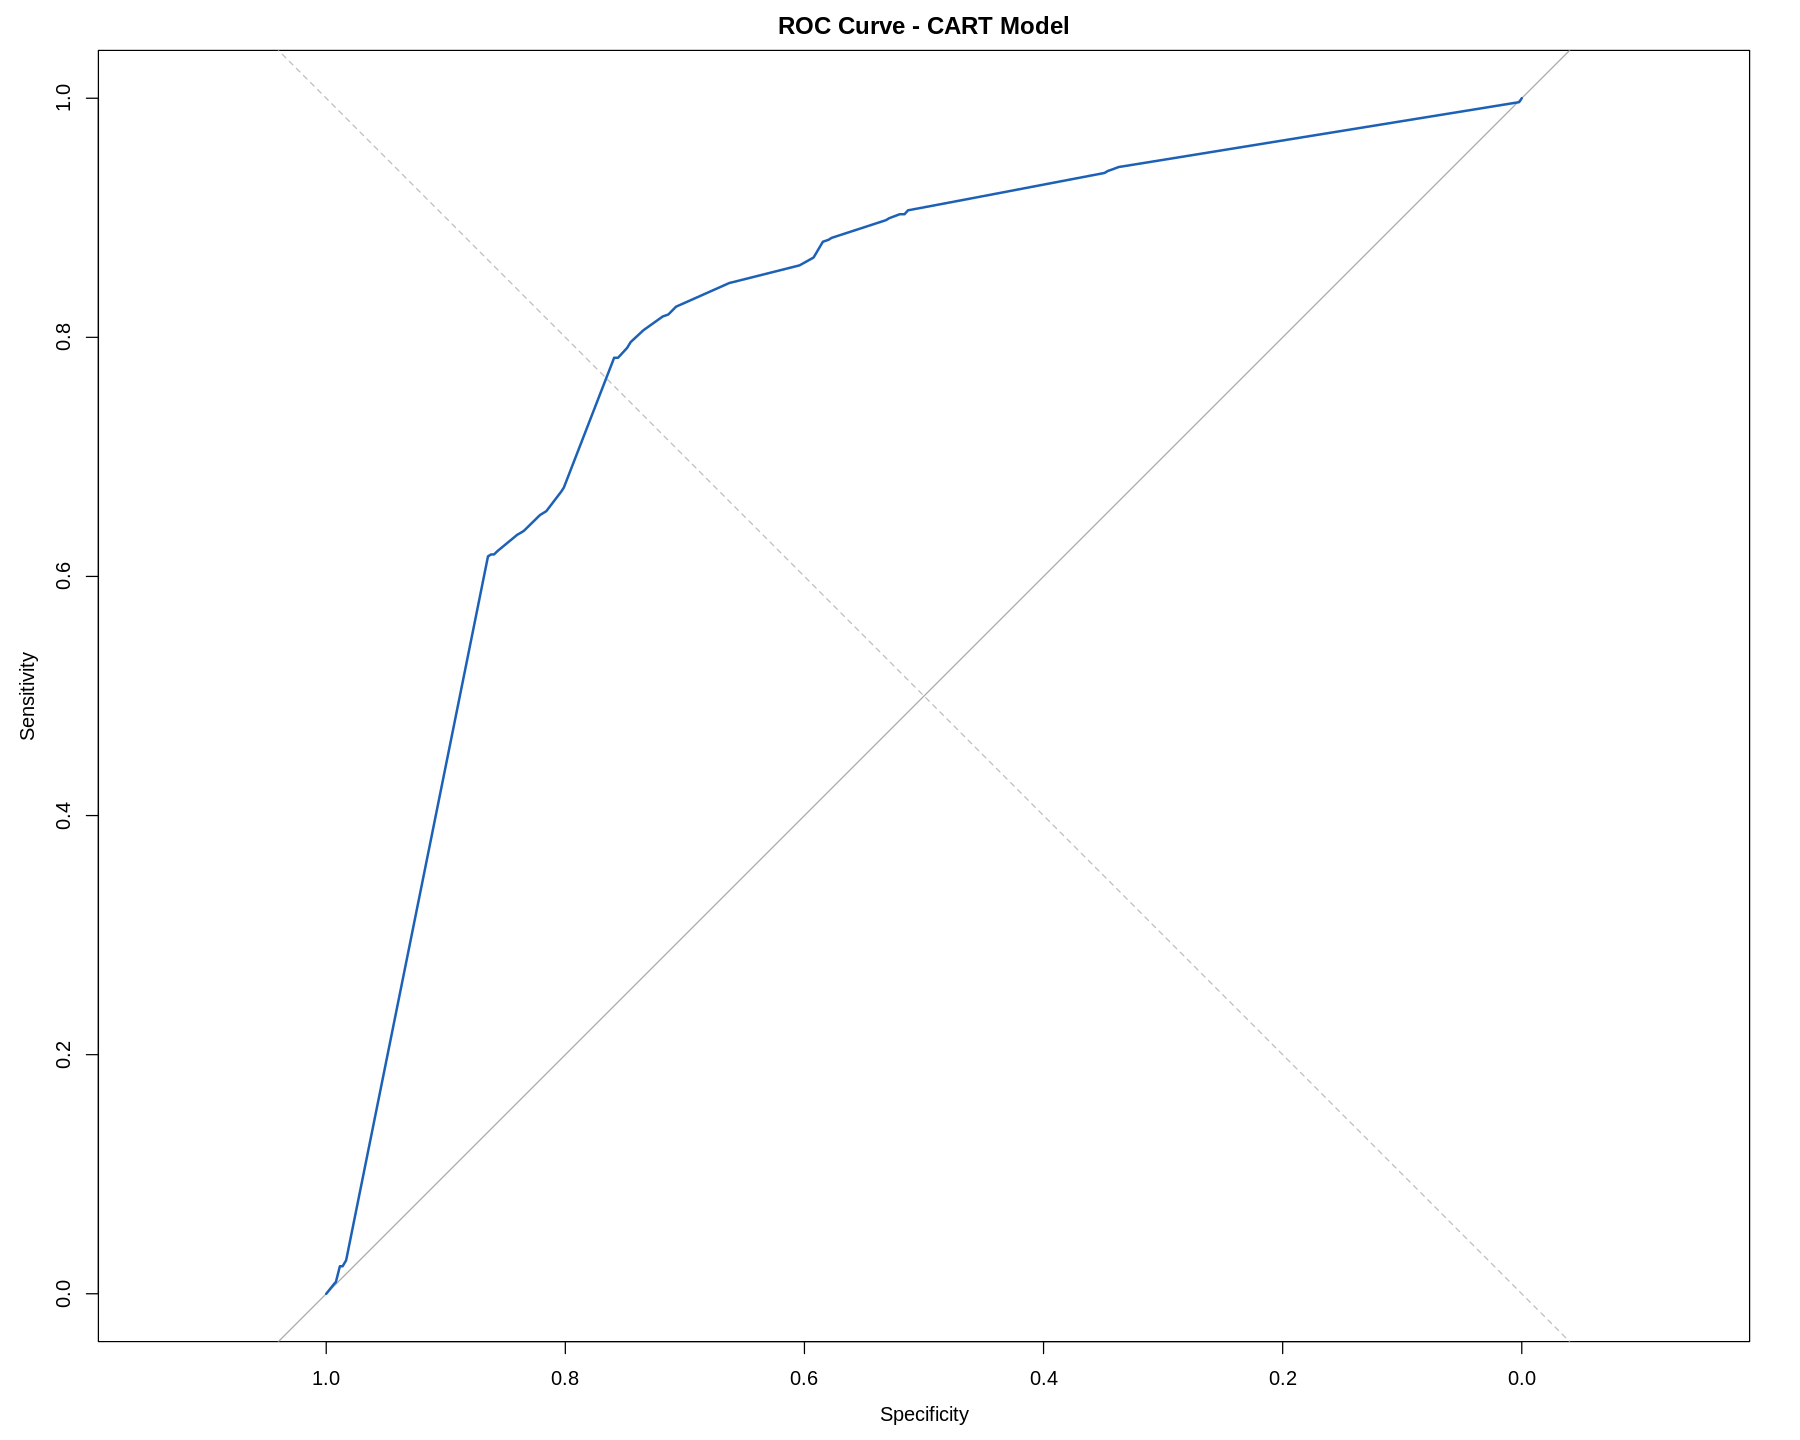

In [ ]:
# Predict probabilities on the validation set
cart_pred_probs <- predict(cart_model, newdata = X_valid, type = "prob")[, 2]  # Probability for class '1'

# Predict classes using 0.5 threshold
cart_pred_class <- ifelse(cart_pred_probs > 0.5, 1, 0)

# Load pROC if not already loaded
if (!require("pROC")) install.packages("pROC")
library(pROC)

# Compute ROC and AUC
cart_roc <- roc(as.numeric(y_valid), cart_pred_probs)  # Make sure y_valid is numeric (0/1)
cart_auc <- auc(cart_roc)

# Print AUC and Accuracy
cat("CART Model Validation AUC:", round(cart_auc, 4), "\n")
accuracy <- mean(cart_pred_class == y_valid)
cat("CART Model Validation Accuracy:", round(accuracy, 4), "\n")

# === Plot the ROC Curve ===
plot(cart_roc, col = "#1c61b6", lwd = 2, main = "ROC Curve - CART Model")
abline(a = 0, b = 1, lty = 2, col = "gray")  # Diagonal line for reference

In [ ]:
#class imbalance
table(y_cart)


y_cart
    0     1 
58416  2400 

## Random Forest Model

Training Random Forest with mtry = 106 and ntree = 200 
ntree      OOB      1      2
   10:   5.22%  1.61% 92.66%
   20:   4.64%  0.90% 95.41%
   30:   4.47%  0.68% 96.38%
   40:   4.39%  0.61% 96.28%
   50:   4.35%  0.55% 96.54%
   60:   4.36%  0.54% 97.04%
   70:   4.31%  0.49% 97.04%
   80:   4.31%  0.49% 97.01%
   90:   4.28%  0.45% 97.14%
  100:   4.28%  0.45% 97.21%
  110:   4.28%  0.45% 97.37%
  120:   4.26%  0.42% 97.41%
  130:   4.25%  0.41% 97.37%
  140:   4.25%  0.41% 97.41%
  150:   4.25%  0.41% 97.41%
  160:   4.25%  0.41% 97.37%
  170:   4.24%  0.41% 97.24%
  180:   4.25%  0.42% 97.24%
  190:   4.24%  0.41% 97.27%
  200:   4.24%  0.40% 97.44%

Call:
 randomForest(x = train_features, y = train_target, ntree = final_ntree,      mtry = best_mtry, importance = TRUE, do.trace = 10) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 106

        OOB estimate of  error rate: 4.24%
Confusion matrix

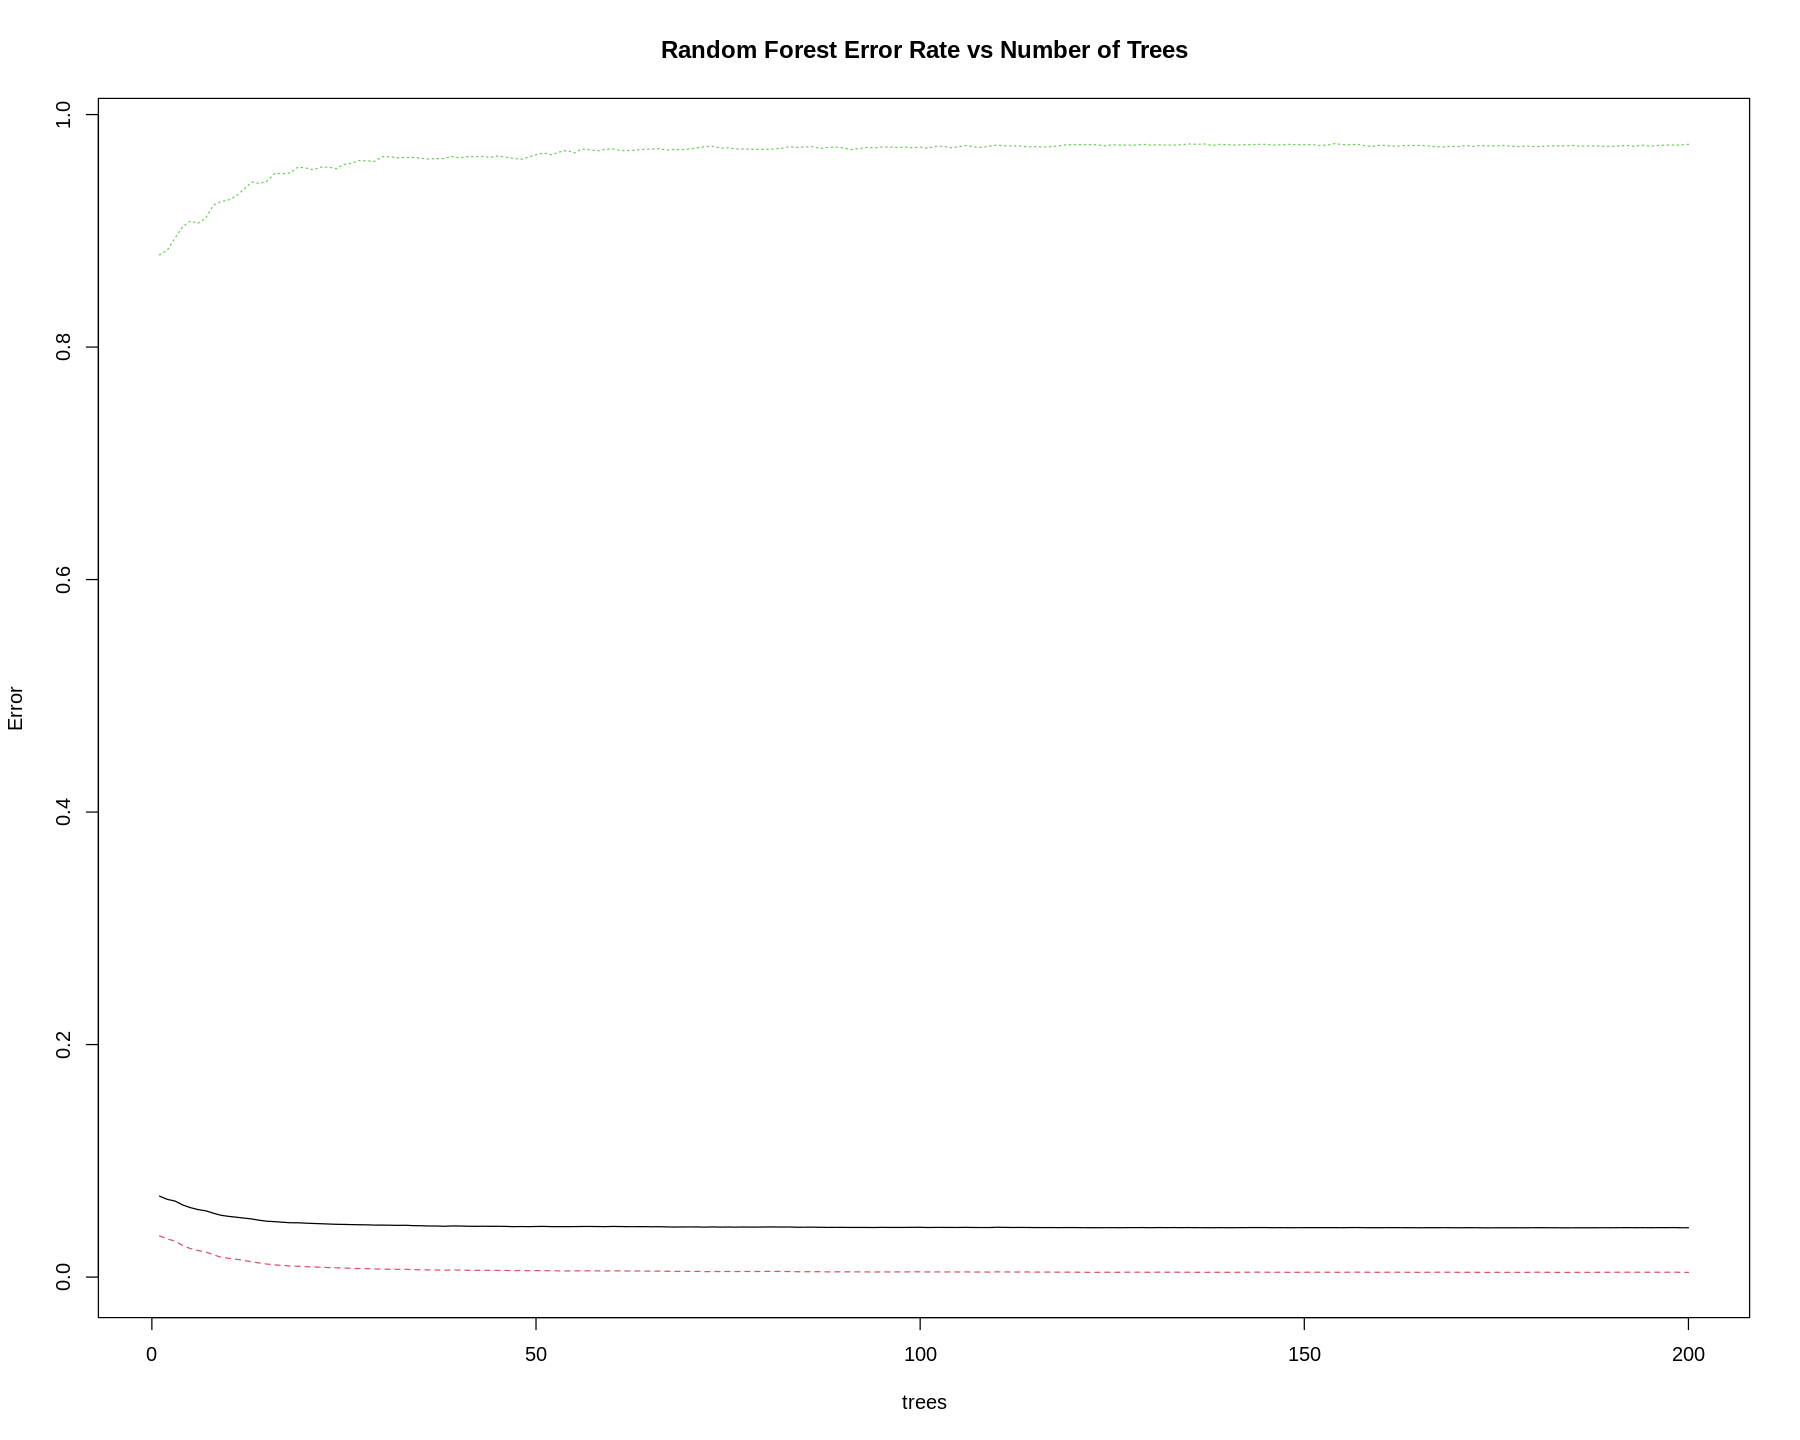

Top 20 important variables:
                                0            1 MeanDecreaseAccuracy
var15                   56.006384  40.96989317             64.86997
num_var22_hace3         41.308749 -19.47851405             39.01714
num_var45_hace3         41.227417 -21.21133482             38.89830
num_var45_hace2         36.353222 -16.59705690             36.12557
saldo_var30             30.524498   0.06359148             31.49830
num_var45_ult1          32.140240 -22.04218837             31.32235
num_var22_hace2         32.175313 -14.64466247             30.97507
saldo_medio_var5_ult3   22.957499 -14.32096346             22.81357
saldo_medio_var5_hace2  22.054756  -8.43943440             22.56454
saldo_var5              18.722641 -13.78175149             18.61971
saldo_medio_var5_ult1   18.231871 -12.54444943             18.00599
num_op_var41_hace2      16.741072  -7.99017144             16.53861
saldo_medio_var5_hace3  14.314038   2.30588768             16.40163
imp_op_var41_comer_u

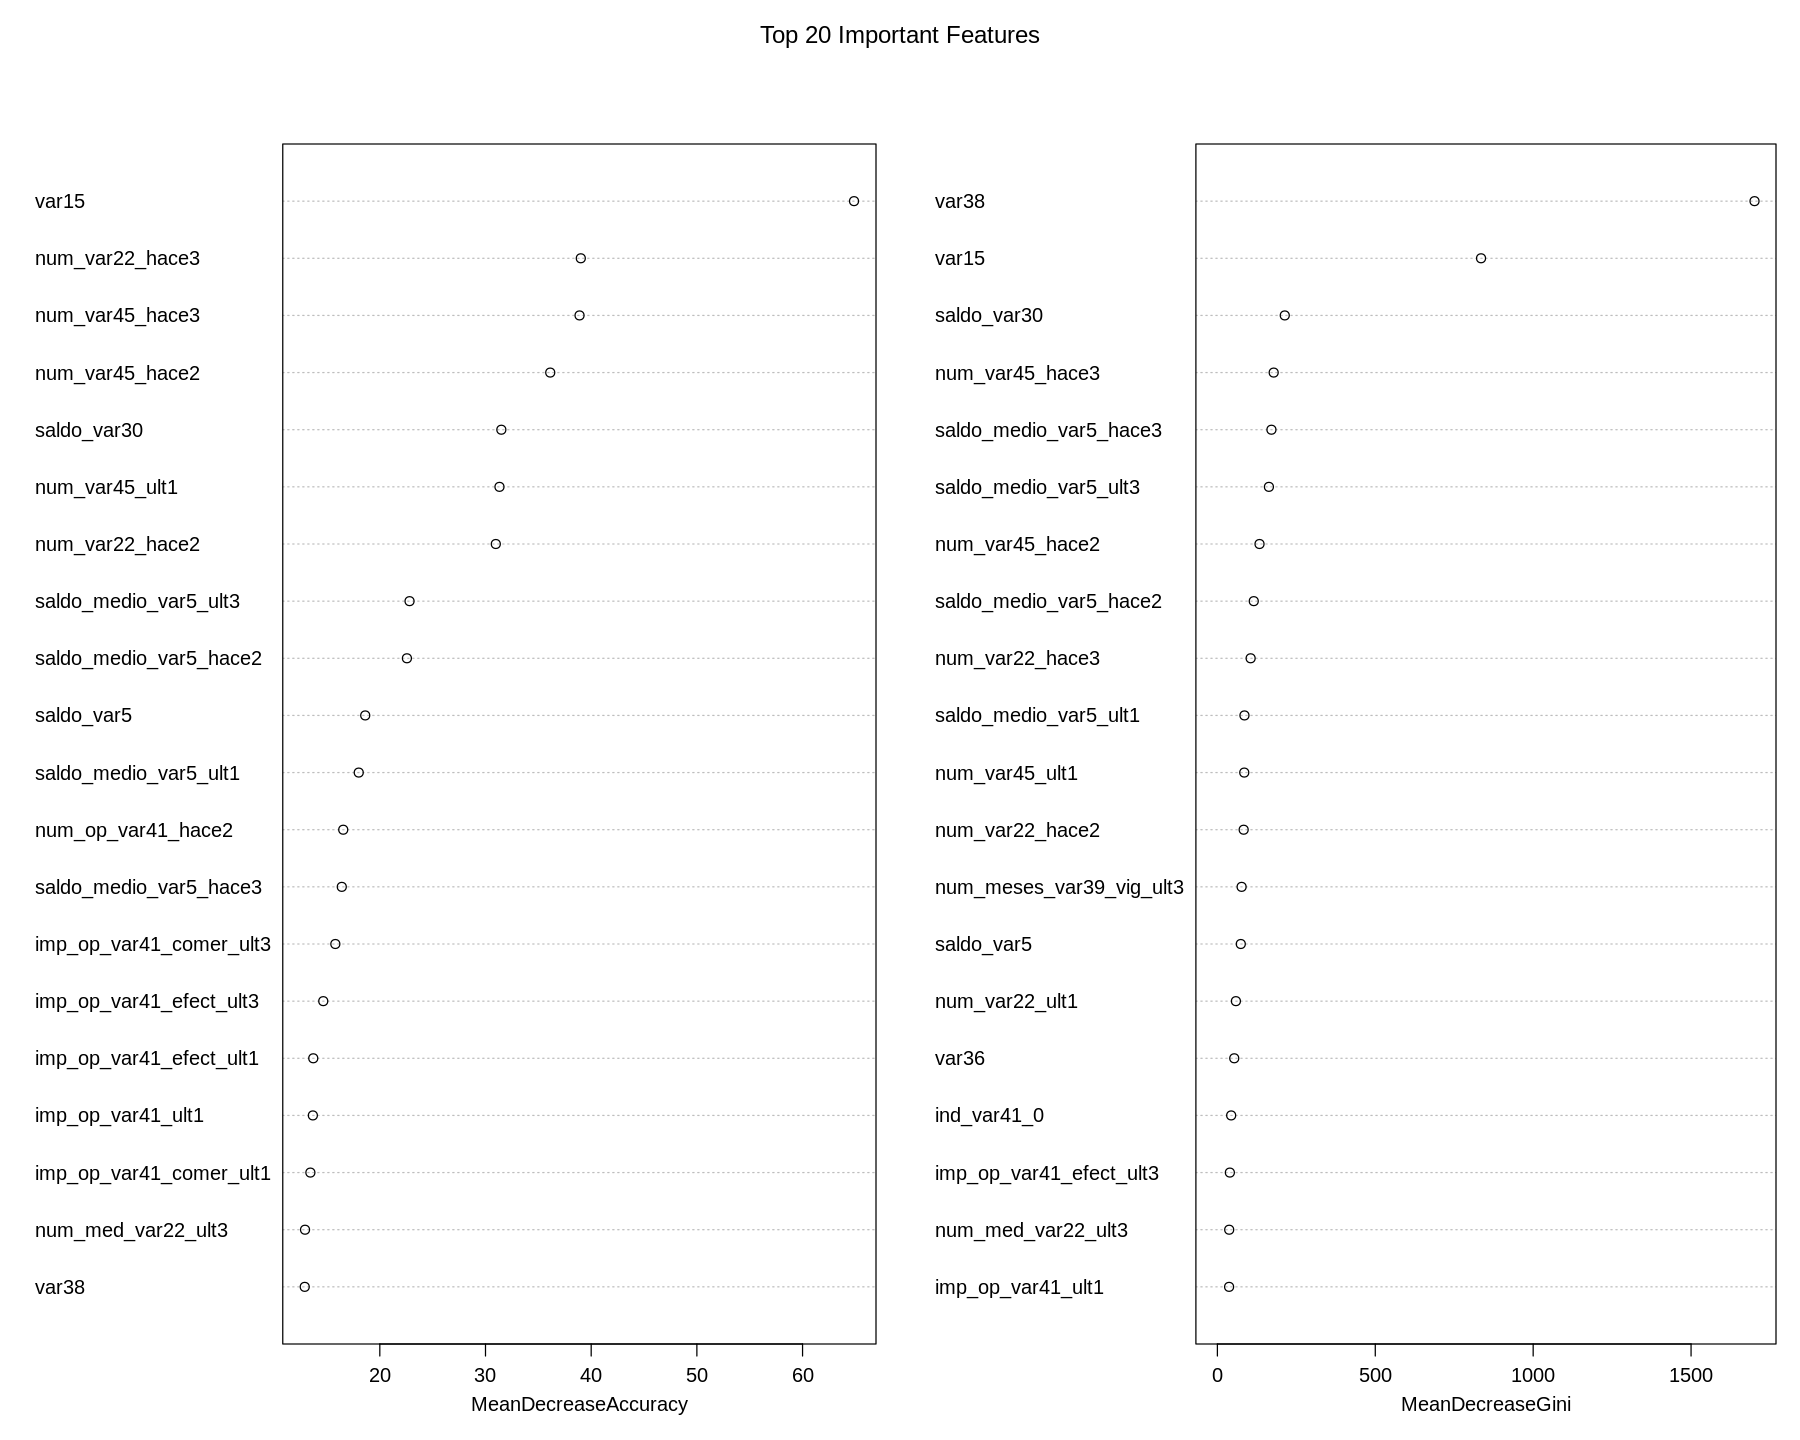

In [ ]:
# Load required packages
if(!require("randomForest")) install.packages("randomForest")
if(!require("pROC")) install.packages("pROC")
library(randomForest)
library(pROC)

# Prepare full training data
train_features <- df_train_normalized[, !names(df_train_normalized) %in% c("ID", "TARGET")]
train_target <- factor(target)  # From the original df_train$TARGET

# Prepare test data
test_features <- df_test_normalized[, !names(df_test_normalized) %in% c("ID")]
test_ids <- df_test$ID

# Align train and test features
common_cols <- intersect(names(train_features), names(test_features))
train_features <- train_features[, common_cols]
test_features <- test_features[, common_cols]

# Set hyperparameters
best_mtry <- 106
final_ntree <- 200

cat("Training Random Forest with mtry =", best_mtry, "and ntree =", final_ntree, "\n")

# Train RF on the full training set
final_rf <- randomForest(
  x = train_features,
  y = train_target,
  ntree = final_ntree,
  mtry = best_mtry,
  importance = TRUE,
  do.trace = 10  # Show progress every 10 trees
)

# Model summary
print(final_rf)

# Plot error rate
plot(final_rf, main = "Random Forest Error Rate vs Number of Trees")

# Plot top 20 important variables
varImpPlot(final_rf, sort = TRUE, n.var = 20, main = "Top 20 Important Features")

# Show importance values
var_imp <- importance(final_rf)
var_imp_sorted <- var_imp[order(var_imp[, 3], decreasing = TRUE), ]
cat("Top 20 important variables:\n")
print(head(var_imp_sorted, 20))

# Predict probabilities on test data
test_probs <- predict(final_rf, test_features, type = "prob")[, 2]

# Create submission
submission <- data.frame(
  ID = test_ids,
  TARGET = test_probs
)

cat("First few rows of submission:\n")
print(head(submission))

# Save to CSV
write.csv(submission, "rf_submission.csv", row.names = FALSE)
cat("Submission file 'rf_submission.csv' created successfully.\n")

### Model Evaluation & ROC, AUC, F1-score Curve for Random Forest

In [ ]:
# Load required packages
if(!require("caret")) install.packages("caret")
if(!require("randomForest")) install.packages("randomForest")
if(!require("pROC")) install.packages("pROC")
library(caret)
library(randomForest)
library(pROC)

# Prepare data
train_features <- df_train_normalized[, !names(df_train_normalized) %in% c("ID", "TARGET")]
train_target <- factor(target)  # From the original df_train$TARGET

# Use same 70/30 validation split
set.seed(123)
val_indices <- sample(seq_len(nrow(train_features)), size = 0.3 * nrow(train_features))
val_features <- train_features[val_indices, ]
val_target <- train_target[val_indices]
train_subset_features <- train_features[-val_indices, ]
train_subset_target <- train_target[-val_indices]

In [ ]:
# Set parameters
best_mtry <- 106
final_ntree <- 200

# Train the Random Forest model
rf_model <- randomForest(
  x = train_subset_features,
  y = train_subset_target,
  ntree = final_ntree,
  mtry = best_mtry,
  importance = TRUE,
  do.trace = 10
)

# Predict on validation set (class labels)
val_rf_pred <- predict(rf_model, val_features)

# Evaluate classification metrics
val_rf_pred_factor <- factor(val_rf_pred, levels = c(0, 1))
val_target_factor <- factor(val_target, levels = c(0, 1))

conf_matrix_rf <- confusionMatrix(val_rf_pred_factor, val_target_factor, positive = "1")

cat("RF Validation F1 Score:", round(conf_matrix_rf$byClass["F1"], 4), "\n")
cat("RF Validation Precision:", round(conf_matrix_rf$byClass["Precision"], 4), "\n")
cat("RF Validation Recall:", round(conf_matrix_rf$byClass["Recall"], 4), "\n")
print(conf_matrix_rf$table)

ntree      OOB      1      2
   10:   5.35%  1.71% 93.01%
   20:   4.75%  0.99% 95.20%
   30:   4.56%  0.76% 95.76%
   40:   4.51%  0.70% 96.14%
   50:   4.41%  0.60% 96.19%
   60:   4.39%  0.57% 96.28%
   70:   4.37%  0.54% 96.47%
   80:   4.37%  0.53% 96.71%
   90:   4.37%  0.52% 96.75%
  100:   4.36%  0.50% 96.99%
  110:   4.36%  0.50% 97.22%
  120:   4.34%  0.48% 97.27%
  130:   4.33%  0.47% 97.22%
  140:   4.32%  0.46% 97.13%
  150:   4.33%  0.46% 97.32%
  160:   4.33%  0.46% 97.36%
  170:   4.32%  0.45% 97.27%
  180:   4.30%  0.44% 97.18%
  190:   4.31%  0.45% 97.13%
  200:   4.31%  0.44% 97.46%
RF Validation F1 Score: 0.0626 
RF Validation Precision: 0.2286 
RF Validation Recall: 0.0362 
          Reference
Prediction     0     1
         0 21815   851
         1   108    32


Setting levels: control = 0, case = 1

Setting direction: controls < cases



RF Validation AUC: 0.7606 


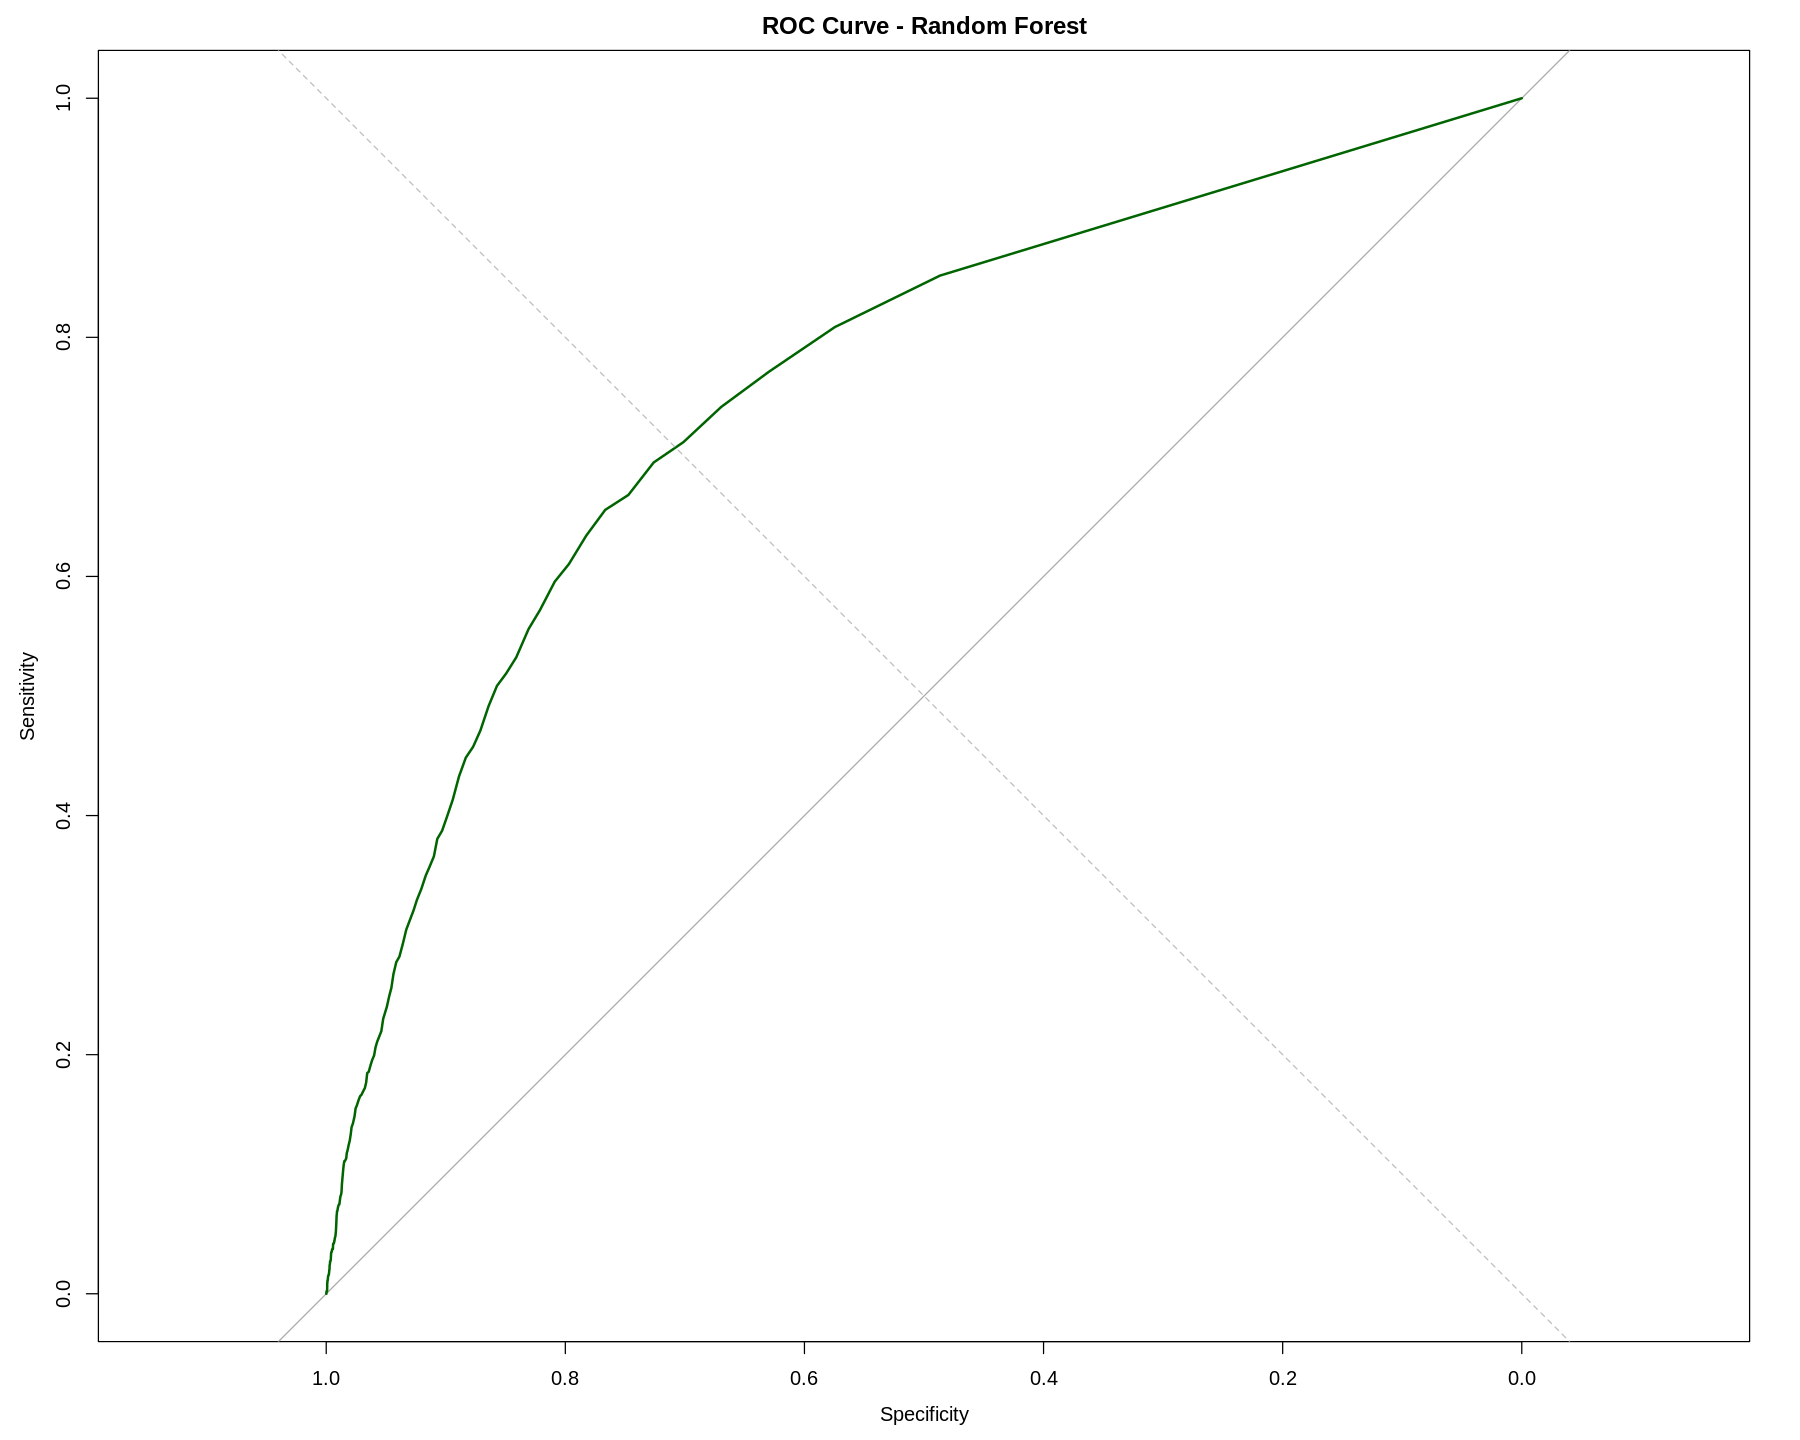

In [ ]:
# Predict on validation set (probabilities for class 1)
val_rf_probs <- predict(rf_model, val_features, type = "prob")[, 2]

# Compute ROC and AUC
roc_rf <- roc(val_target, val_rf_probs)
auc_rf <- auc(roc_rf)

# Plot ROC
plot(roc_rf, col = "darkgreen", lwd = 2, main = "ROC Curve - Random Forest")
abline(a = 0, b = 1, lty = 2, col = "gray")

cat("RF Validation AUC:", round(auc_rf, 4), "\n")

## KNN model

In [ ]:
# Load required libraries
if (!require("class")) install.packages("class", dependencies = TRUE)
library(class)

# Ensure target is extracted from original df_train (not from the normalized data)
target <- df_train$TARGET  # Extract target labels

# Prepare normalized training and test features
train_features <- df_train_normalized  # Already preprocessed and normalized
test_features <- df_test_normalized

# Remove ID column if it exists
train_features <- train_features[, !names(train_features) %in% "ID"]
test_features <- test_features[, !names(test_features) %in% "ID"]

# Extract test IDs
test_ids <- df_test$ID

# Ensure column alignment
common_cols <- intersect(names(train_features), names(test_features))
train_features <- train_features[, common_cols]
test_features <- test_features[, common_cols]

# Align target length
train_target <- target
stopifnot(nrow(train_features) == length(train_target))

# Run KNN with k = 201 on full training set
cat("Running KNN with k = 201 on full training set...\n")
final_knn <- knn(
  train = train_features,
  test = test_features,
  cl = train_target,
  k = 216,
  prob = TRUE
)

# Extract probability of class 1
win_vote_prop <- attr(final_knn, "prob")
test_probs <- ifelse(final_knn == 1, win_vote_prop, 1 - win_vote_prop)

# Create submission dataframe
submission <- data.frame(
  ID = test_ids,
  TARGET = test_probs
)

# Write to CSV
write.csv(submission, "knn_k201_submission.csv", row.names = FALSE)
cat("Submission file 'knn_k201_submission.csv' created successfully.\n")

Running KNN with k = 201 on full training set...
Submission file 'knn_k201_submission.csv' created successfully.


### Model Evaluation & ROC Curve for KNN

In [ ]:
# Load required packages
if (!require("caret")) install.packages("caret")
if (!require("class")) install.packages("class")  # For knn
if (!require("pROC")) install.packages("pROC")
library(caret)
library(class)
library(pROC)

# Create 70/30 validation split (do this once and reuse)
set.seed(123)
val_indices <- sample(seq_len(nrow(train_features)), size = 0.3 * nrow(train_features))
val_features <- train_features[val_indices, ]
val_target <- train_target[val_indices]
train_subset_features <- train_features[-val_indices, ]
train_subset_target <- train_target[-val_indices]

In [ ]:
# Predict using KNN
val_pred_class <- knn(
  train = train_subset_features,
  test = val_features,
  cl = train_subset_target,
  k = 201
)

# Convert to factors for caret metrics
val_pred_factor <- factor(val_pred_class, levels = c(0, 1))
val_target_factor <- factor(val_target, levels = c(0, 1))

# Compute and print confusion matrix metrics
conf_matrix <- confusionMatrix(val_pred_factor, val_target_factor, positive = "1")

cat("Validation F1 Score:", round(conf_matrix$byClass["F1"], 4), "\n")
cat("Validation Precision:", round(conf_matrix$byClass["Precision"], 4), "\n")
cat("Validation Recall:", round(conf_matrix$byClass["Recall"], 4), "\n")
print(conf_matrix$table)

In [ ]:
# Predict again with prob = TRUE to extract probabilities
knn_val_pred <- knn(
  train = train_subset_features,
  test = val_features,
  cl = train_subset_target,
  k = 201,
  prob = TRUE
)

# Compute probabilities for class 1
win_vote_prop <- attr(knn_val_pred, "prob")
val_probs <- ifelse(knn_val_pred == 1, win_vote_prop, 1 - win_vote_prop)

# ROC and AUC
roc_obj <- roc(val_target, val_probs)
auc_val <- auc(roc_obj)

# Plot ROC
plot(roc_obj, col = "#1c61b6", lwd = 2, main = "ROC Curve - KNN (k = 201)")
abline(a = 0, b = 1, lty = 2, col = "gray")

cat("Validation AUC (k = 201):", round(auc_val, 4), "\n")

## XGboost Model
1.	Train your model onkaggleraining set (with known TARGET values).
2.	Validate performance using a validation set (split from training data).
3.	Once satisfied with model performance:

	•	Retrain it on the entire training set to maximize learning.

4.	Predict probabilities for the unlabeled test set
5. Submit prediction to kaggle

In [ ]:
library(caret)
library(xgboost)
library(pROC)

# Step 5: Convert to DMatrix -------------------------------------------

dtrain <- xgb.DMatrix(data = as.matrix(X_train), label = y_train)
dvalid <- xgb.DMatrix(data = as.matrix(X_valid), label = y_valid)

# Step 5.5: Calculate scale_pos_weight for class imbalance -------------
scale_pos_weight <- sum(y_train == 0) / sum(y_train == 1)
cat("Scale pos weight:", scale_pos_weight, "\n")

# Step 6: Model parameters ---------------------------------------------

params <- list(
  objective = "binary:logistic",
  eval_metric = "auc",
  max_depth = 6,
  eta = 0.05,
  scale_pos_weight = scale_pos_weight   # 🔥 FIXED: Added this!
)

# Step 7: Train the model ----------------------------------------------

xgb_model <- xgb.train(
  params = params,
  data = dtrain,
  nrounds = 500,
  watchlist = list(validation = dvalid),
  early_stopping_rounds = 20,
  verbose = 1
)

# Step 8: Predict and evaluate -----------------------------------------

pred_probs <- predict(xgb_model, as.matrix(X_valid))
roc_obj <- roc(y_valid, pred_probs)
auc_value <- auc(roc_obj)

cat("Validation AUC:", auc_value, "\n")

# ============================================================
# Step 9: Ensure test has all training features
# ============================================================

final_features <- colnames(df_train_preprocessed)

missing_cols <- setdiff(final_features, colnames(df_test_preprocessed))
if (length(missing_cols) > 0) {
  cat("Adding missing columns to test set:\n")
  print(missing_cols)
  for (col in missing_cols) {
    df_test_preprocessed[[col]] <- 0  # Add missing columns with 0
  }
}

# Match column order
df_test_clean <- df_test_preprocessed[, final_features, drop = FALSE]

cat("Test set columns now match training set columns:", ncol(df_test_clean), "\n")

# =====================================================
# Step 10: Retrain full model on ALL training data
# =====================================================

dtrain_full <- xgb.DMatrix(data = as.matrix(df_train_preprocessed), label = target)

xgb_model_full <- xgb.train(
  params = params,
  data = dtrain_full,
  nrounds = xgb_model$best_iteration
)

# =====================================================
# Step 11: Make predictions on test set
# =====================================================

dtest <- xgb.DMatrix(data = as.matrix(df_test_clean))
test_predictions <- predict(xgb_model_full, dtest)

# =====================================================
# Step 12: Prepare submission file
# =====================================================

submission <- df_sample_submission
submission$TARGET <- test_predictions

write.csv(submission, "xgboost_submission.csv", row.names = FALSE)
cat("Submission file 'xgboost_submission.csv' created successfully.\n")


Scale pos weight: 24.34 
[1]	validation-auc:0.827004 
Will train until validation_auc hasn't improved in 20 rounds.

[2]	validation-auc:0.827042 
[3]	validation-auc:0.833506 
[4]	validation-auc:0.837468 
[5]	validation-auc:0.840502 
[6]	validation-auc:0.840229 
[7]	validation-auc:0.840754 
[8]	validation-auc:0.840680 
[9]	validation-auc:0.841599 
[10]	validation-auc:0.841432 
[11]	validation-auc:0.841467 
[12]	validation-auc:0.841068 
[13]	validation-auc:0.840623 
[14]	validation-auc:0.840302 
[15]	validation-auc:0.841155 
[16]	validation-auc:0.841278 
[17]	validation-auc:0.841519 
[18]	validation-auc:0.841391 
[19]	validation-auc:0.841818 
[20]	validation-auc:0.842214 
[21]	validation-auc:0.842257 
[22]	validation-auc:0.842588 
[23]	validation-auc:0.843201 
[24]	validation-auc:0.843795 
[25]	validation-auc:0.843880 
[26]	validation-auc:0.843969 
[27]	validation-auc:0.844433 
[28]	validation-auc:0.844589 
[29]	validation-auc:0.844786 
[30]	validation-auc:0.845464 
[31]	validation-auc:0

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Validation AUC: 0.8476621 
Test set columns now match training set columns: 172 
Submission file 'xgboost_submission.csv' created successfully.


## Model Evaluation & ROC, AUC, F1-scoreCurve for XGboost

AUC = 0.8477 


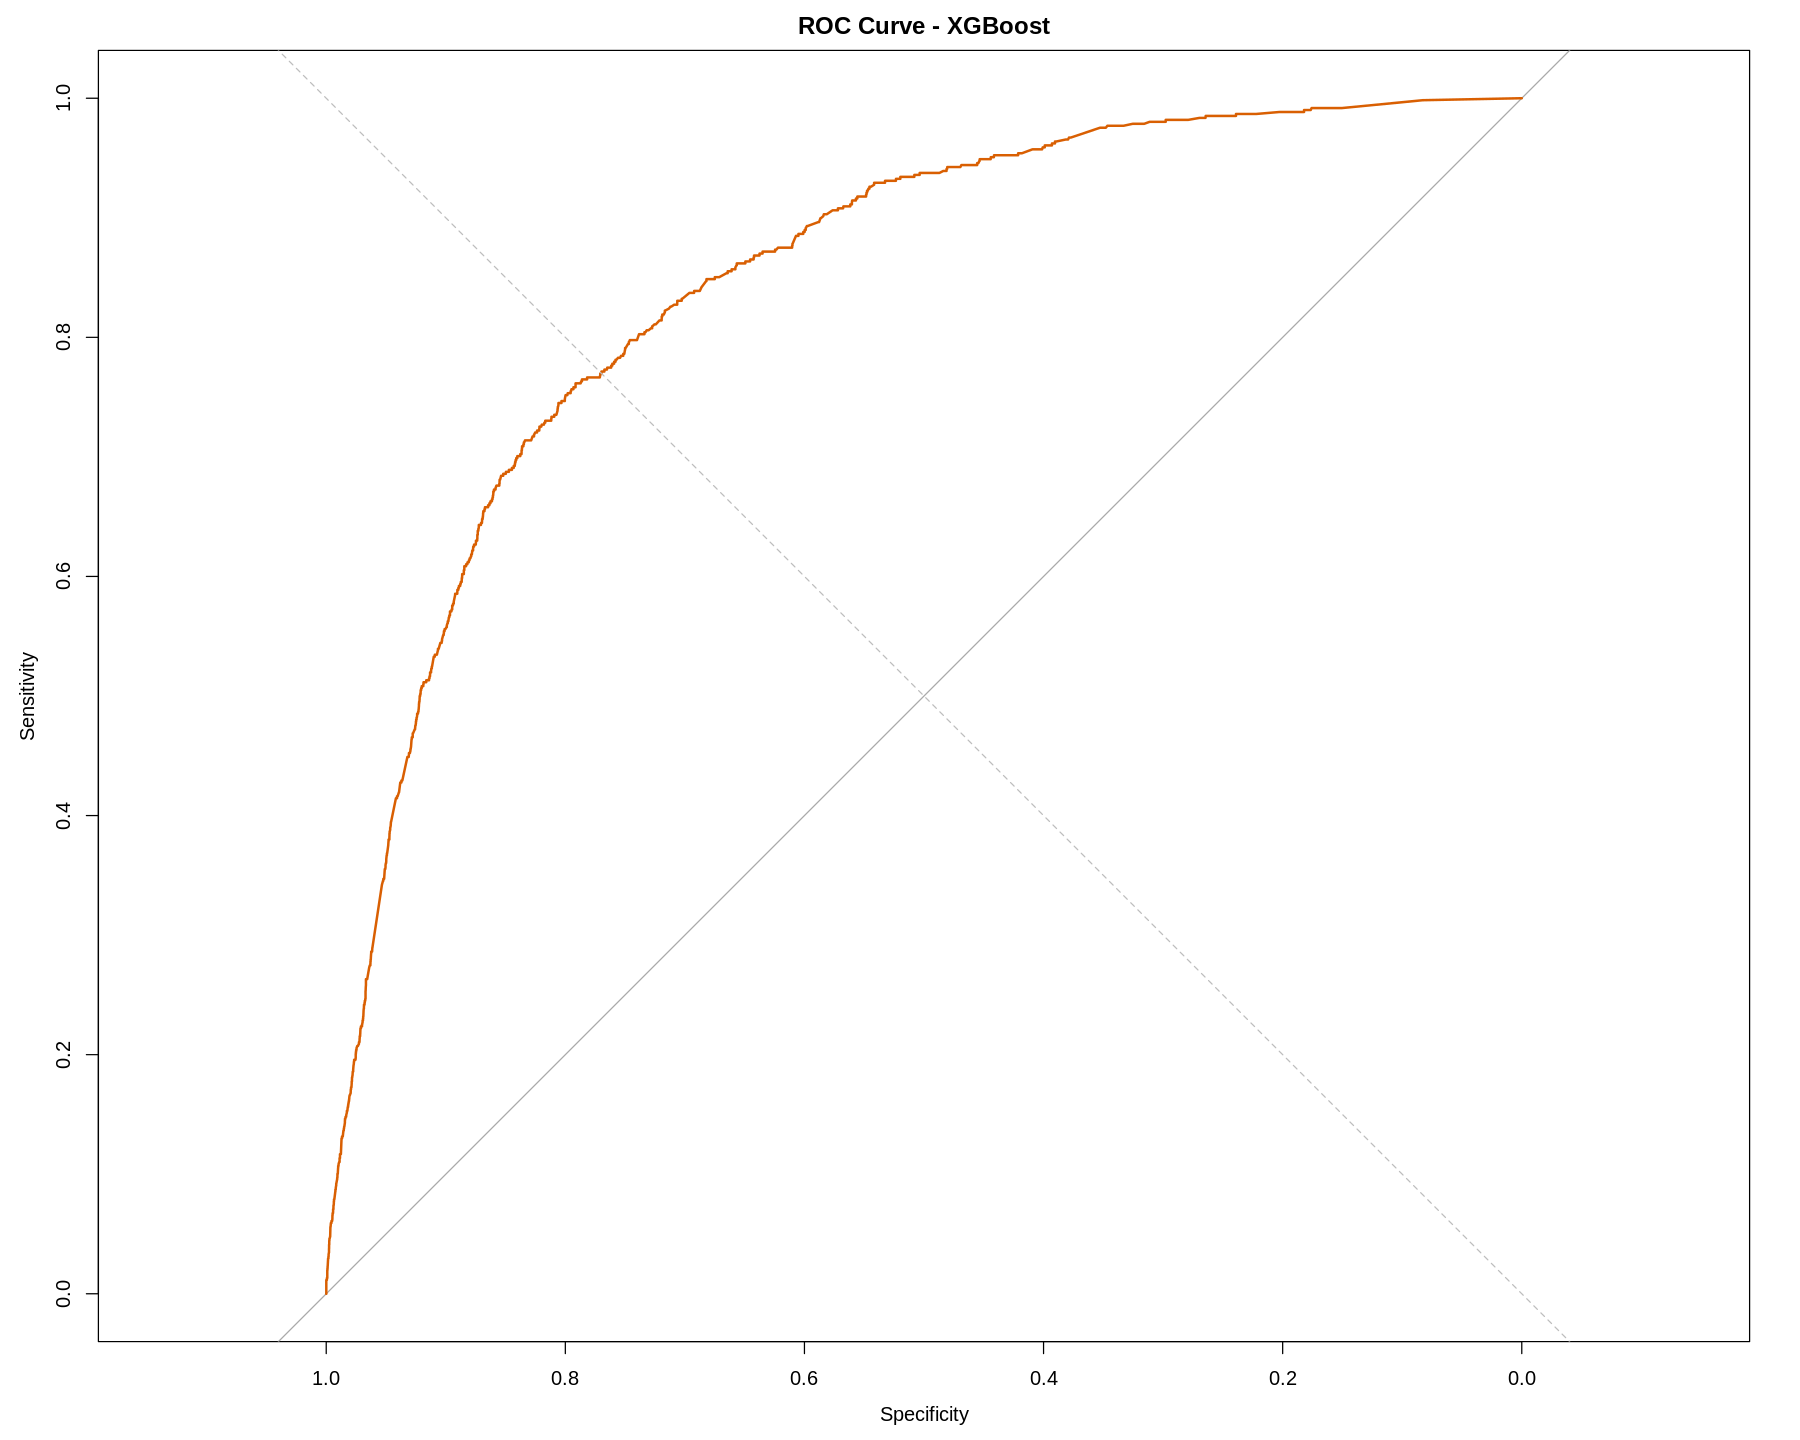

In [ ]:
# === ROC Curve Visualization ===
plot(roc_obj, col = "#D95F02", lwd = 2, main = "ROC Curve - XGBoost")
abline(a = 0, b = 1, lty = 2, col = "gray")  # Reference diagonal
cat("AUC =", round(auc_value, 4), "\n")

In [ ]:
# === F1 Score Calculation ===

# Convert predicted probabilities to class labels using 0.5 threshold
pred_class <- ifelse(pred_probs > 0.5, 1, 0)

# Convert y_valid to factor to match caret's expected input
y_valid_factor <- factor(y_valid, levels = c(0, 1))
pred_class_factor <- factor(pred_class, levels = c(0, 1))

# Compute confusion matrix and F1 score
conf_matrix <- confusionMatrix(pred_class_factor, y_valid_factor, positive = "1")
f1 <- conf_matrix$byClass["F1"]

cat("Validation F1 Score:", round(f1, 4), "\n")

Validation F1 Score: 0.0065 


parameter tuning for f1 score

In [ ]:
library(caret)
library(pROC)

# 1️⃣ Create thresholds to test
thresholds <- seq(0.01, 0.99, by = 0.01)

# 2️⃣ Empty vector to store F1 scores for each threshold
f1_scores <- numeric(length(thresholds))

# 3️⃣ Loop over thresholds
for (i in seq_along(thresholds)) {
  t <- thresholds[i]
  pred_class <- ifelse(pred_probs > t, 1, 0)

  # Factors to match caret's expected input
  y_valid_factor <- factor(y_valid, levels = c(0, 1))
  pred_class_factor <- factor(pred_class, levels = c(0, 1))

  # Confusion Matrix and F1
  conf_matrix <- confusionMatrix(pred_class_factor, y_valid_factor, positive = "1")
  f1_scores[i] <- conf_matrix$byClass["F1"]
}

# 4️⃣ Find the best threshold and corresponding F1
best_idx <- which.max(f1_scores)
best_threshold <- thresholds[best_idx]
best_f1 <- f1_scores[best_idx]

cat("Best Threshold:", best_threshold, "\n")
cat("Best F1 Score:", round(best_f1, 4), "\n")


Best Threshold: 0.77 
Best F1 Score: 0.2962 
